<h1 align="center">Optimizing Santander Cycles Pricing with Linear Regression and ARIMA</h1>
 <h3 align="center">December 2019</h3>

<h3>Table of Contents</h3>

* [1. Introduction](#1.-Introduction)
    * [1.1 Business Problem](#1.1-Business-Problem)
    * [1.2 Objective](#1.2-Objective)
* [2. Dataset](#2.-Dataset)
* [3. Data Cleaning & Preparation](#3.-Data-Cleaning-&-Preparation)
* [4. Exploring the Data](#4.-Exploring-the-Data)
    * [4.1 Variable Overview](#4.1-Variable-Overview)
    * [4.2 Data Visualisation](#4.2-Data-Visualisation)
        * [4.2.1 Distributions](#4.2.1-Distributions)
        * [4.2.2 Outliers](#4.2.2-Outliers)
* [5. Preparing the Data for Analysis](#5.-Preparing-the-Data-for-Analysis)
* [6. Linear Regression Model](#6.-Linear-Regression-Model)
* [7. Time Series - ARIMA](#7.-Time-Series---ARIMA)
* [8. Summary and Limitations](#8.-Summary-and-Limitations)
* [Appendix: Reflection on JIRA ](#Appendix:-Reflection-on-JIRA)
* [References](#References)

## 1. Introduction

### 1.1 Business Problem

Transport for London (TfL) is a local government body tasked with managing the transport system in Greater London. TfL is responsible for meeting the Mayor’s strategy on transport in Greater London. 

The strategy includes reaching the target that 80% of all journeys in London will be made on foot, by cycle or using public transport by 2041. 

TfL’s cycle hire scheme, Santander Cycles, is a service offering bike-rentals 24 hours a day, in London.

Hiring a Santander Cycle costs £2 and allows access to the bicycle for 24 hours. In 24 hours, customers can make as many journeys as they like. If the journey lasts less than 30 minutes, they are only charged with £2 for hire. If the journey lasts longer than 30 minutes, customers pay an additional £2 for every 30 minutes.

With this information in mind, we thought about how we, as data analysts, can help TfL and the Mayor of London achieve the goal of having 80% of all journeys in London made on foot, by cycle or public transport and came up with a problem we want to tackle with our analysis:


### How can TfL’s pricing strategy for Santander Cycles be improved to increase bicycle rentals?

### 1.2 Objective

We set out to analyze what drives demand for bike-rentals in London. We examine a number of variables on time and weather conditions. With our results, we want to advise TfL to improve their pricing strategy in a way that takes demand into account and incentivizes Londoners to use bike-rentals.

## 2. Dataset
The dataset we used for our analysis is the 'London bike sharing dataset' found on Kaggle under the following link: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset 

In [1]:
#ADDITION
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Adding package to load data
# import faculty.datasets as datasets

# Loading key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

# pretty graphs 
from pylab import *

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

vcvtype = 'nonrobust'

In [3]:
# loading the dataset to the variable bike_data
bike_data = pd.read_csv("./london_merged.csv", encoding = "ISO-8859-1")

# creating a DataFrame from bike_data
bike_df = pd.DataFrame(bike_data)

In [4]:
# first glance at dataset
bike_df.head(10)

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   
5  2015-01-04 05:00:00   46  2.0  2.0   93.0         4.0           1.0   
6  2015-01-04 06:00:00   51  1.0 -1.0  100.0         7.0           4.0   
7  2015-01-04 07:00:00   75  1.0 -1.0  100.0         7.0           4.0   
8  2015-01-04 08:00:00  131  1.5 -1.0   96.5         8.0           4.0   
9  2015-01-04 09:00:00  301  2.0 -0.5  100.0         9.0           3.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  
5         0.0         1.0     3.0  
6         0.0         1.0     3.0  
7         0.0         1.0     3.0  
8         0.0         1.0     3.0  
9         0.0         1.0     3.0

In [5]:
# show list of variables, number of observations per variable and datatype of each variable 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# checking categories of weather_code
bike_df['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

### Weather Code Column Description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity

2 = scattered clouds / few clouds 

3 = Broken clouds 

4 = Cloudy 

7 = Rain/ light Rain shower/ Light rain 

10 = rain with thunderstorm 

26 = snowfall 94 = Freezing Fog


In [7]:
# checking categories of holiday
bike_df['is_holiday'].unique()

array([0., 1.])

In [8]:
# checking categories of weekend
bike_df['is_weekend'].unique()

array([1., 0.])

In [9]:
# checking categories of season
bike_df['season'].unique()

array([3., 0., 1., 2.])

### Variable Description: </br>

<li>"cnt" - number of bike-rentals</li>
<li>"t1" - temparature in C</li>
<li>"t2" - temperature in C "feels like"</li>
<li>"hum" - humidity in %</li>
<li>"wind_speed" - wind speed in km/h</li>
<li>"weather_code" - weather category</li>
<li>"is_holiday" - boolean - 1 holiday / 0 non holiday</li>
<li>"is_weekend" - boolean - 1 if the day is weekend</li>
<li>"season" - meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter</li>

## 3. Data Cleaning & Preparation

In [10]:
# checking if there are any missing values in the dataset as a whole
bike_df.isnull().values.any()

False

As we want to study time effects on bike-rentals, we decided to transform the <i>timestamp</i> variable. We believe we can gain more insights by splitting up the <i>timestamp</i> variable into <i>year</i>, <i>month</i>, <i>month_name</i>, <i>day</i>, <i>weekday</i> and <i>hour</i>.

In [11]:
# creating empty columns to split the variable 'timestamp'
bike_df['year'] = ''
bike_df['month'] = ''
bike_df['month_name'] = ''
bike_df['day'] = ''
bike_df['weekday'] = ''
bike_df['hour'] = ''
bike_df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season year month month_name day weekday hour  
0         0.0         1.0     3.0                                         
1         0.0         1.0     3.0                                         
2         0.0         1.0     3.0                                         
3         0.0         1.0     3.0                                         
4         0.0         1.0     3.0

In [12]:
# copying the timestamp data into date_time variable
date_time = bike_df['timestamp']
date_time.head()

0    2015-01-04 00:00:00
1    2015-01-04 01:00:00
2    2015-01-04 02:00:00
3    2015-01-04 03:00:00
4    2015-01-04 04:00:00
Name: timestamp, dtype: object

In [13]:
# converting the date_time variable to a datetime index
date_time = pd.to_datetime(date_time)
date_time.head()

0   2015-01-04 00:00:00
1   2015-01-04 01:00:00
2   2015-01-04 02:00:00
3   2015-01-04 03:00:00
4   2015-01-04 04:00:00
Name: timestamp, dtype: datetime64[ns]

In [14]:
# replacing the old 'timestamp' date format with the new 'date_time' format
bike_df['timestamp'] = date_time

In [15]:
# checking if code works
bike_df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season year month month_name day weekday hour  
0         0.0         1.0     3.0                                         
1         0.0         1.0     3.0                                         
2         0.0         1.0     3.0                                         
3         0.0         1.0     3.0                                         
4         0.0         1.0     3.0

In [16]:
# splitting up 'timestamp' data into before defined columns
bike_df['year'] = pd.DatetimeIndex(bike_df['timestamp']).year
# month as number
bike_df['month'] = pd.DatetimeIndex(bike_df['timestamp']).month
# month in written form
bike_df['month_name'] = pd.DatetimeIndex(bike_df['timestamp']).month_name()
# # day as number
bike_df['day'] = pd.DatetimeIndex(bike_df['timestamp']).dayofweek
# # day in written form
bike_df['weekday'] = pd.DatetimeIndex(bike_df['timestamp']).day_name()
bike_df['hour'] = pd.DatetimeIndex(bike_df['timestamp']).hour

In [17]:
# checking if code works
bike_df.head(10)

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   
5 2015-01-04 05:00:00   46  2.0  2.0   93.0         4.0           1.0   
6 2015-01-04 06:00:00   51  1.0 -1.0  100.0         7.0           4.0   
7 2015-01-04 07:00:00   75  1.0 -1.0  100.0         7.0           4.0   
8 2015-01-04 08:00:00  131  1.5 -1.0   96.5         8.0           4.0   
9 2015-01-04 09:00:00  301  2.0 -0.5  100.0         9.0           3.0   

   is_holiday  is_weekend  season  year  month month_name  day weekday  hour  
0         0.0         1.0     3.0  2015      1    January    6  Sunday     0  
1         0.0         1.0     3.0  2015      1    January    6  Sunday     1  
2         0.0         1.0     3.0  2015      1    January    6  Sunday     2  
3         0.0         1.0     3.0  2015      1    January    6  Sunday     3  
4         0.0         1.0     3.0  2015      1    January    6  Sunday     4  
5         0.0         1.0     3.0  2015      1    January    6  Sunday     5  
6         0.0         1.0     3.0  2015      1    January    6  Sunday     6  
7         0.0         1.0     3.0  2015      1    January    6  Sunday     7  
8         0.0         1.0     3.0  2015      1    January    6  Sunday     8  
9         0.0         1.0     3.0  2015      1    January    6  Sunday     9

## 4. Exploring the Data

With our data prepared for exploration, we started by exploring all variables and their characteristics such as data type, number of missing values, distribution and outliers.

### 4.1 Variable Overview

In [18]:
# list of variables
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year          17414 non-null  int32         
 11  month         17414 non-null  int32         
 12  month_name    17414 non-null  object        
 13  day           17414 non-null  int32         
 14  weekday       17414 non-null  object        
 15  hour          17414 non-null  int32 

In [19]:
# checking the data type of each variable
bike_df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int32
month                    int32
month_name              object
day                      int32
weekday                 object
hour                     int32
dtype: object

In [20]:
# checking for missing values per variable
bike_df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
year            0
month           0
month_name      0
day             0
weekday         0
hour            0
dtype: int64

In [21]:
# summary statistics
bike_df.describe()

timestamp           cnt            t1  \
count                          17414  17414.000000  17414.000000   
mean   2016-01-03 22:31:00.571953664   1143.101642     12.468091   
min              2015-01-04 00:00:00      0.000000     -1.500000   
25%              2015-07-04 20:15:00    257.000000      8.000000   
50%              2016-01-03 15:30:00    844.000000     12.500000   
75%              2016-07-04 15:45:00   1671.750000     16.000000   
max              2017-01-03 23:00:00   7860.000000     34.000000   
std                              NaN   1085.108068      5.571818   

                 t2           hum    wind_speed  weather_code    is_holiday  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean      11.520836     72.324954     15.913063      2.722752      0.022051   
min       -6.000000     20.500000      0.000000      1.000000      0.000000   
25%        6.000000     63.000000     10.000000      1.000000      0.000000   
50%       12.500000     74.500000     15.000000      2.000000      0.000000   
75%       16.000000     83.000000     20.500000      3.000000      0.000000   
max       34.000000    100.000000     56.500000     26.000000      1.000000   
std        6.615145     14.313186      7.894570      2.341163      0.146854   

         is_weekend        season          year         month          day  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.00000   
mean       0.285403      1.492075   2015.507810      6.514643      2.99265   
min        0.000000      0.000000   2015.000000      1.000000      0.00000   
25%        0.000000      0.000000   2015.000000      4.000000      1.00000   
50%        0.000000      1.000000   2016.000000      7.000000      3.00000   
75%        1.000000      2.000000   2016.000000     10.000000      5.00000   
max        1.000000      3.000000   2017.000000     12.000000      6.00000   
std        0.451619      1.118911      0.508157      3.452509      2.00406   

               hour  
count  17414.000000  
mean      11.513265  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       18.000000  
max       23.000000  
std        6.915893

### Detecting Outliers

What period of time is covered by the data?

In [22]:
#ADDITION
bike_df["year"].max()
bike_df["year"].min()

2017

2015

In [23]:
# calculating the absolute Z-score for t1
z5 = np.abs(stats.zscore(bike_df["t1"]))
bike_df["t1_zscore"] = z5

In [24]:
# finding and printing temperature where the Z-score is above 3
bike_df1 = bike_df[bike_df['t1_zscore'] > 3.5
]
bike_df1['t1']

4272     33.0
4273     32.0
4275     33.0
4276     33.5
4277     33.5
4278     34.0
4279     34.0
4280     33.5
13418    32.0
13419    32.0
13420    32.0
14276    32.0
14277    32.5
14278    32.5
14717    32.5
14718    33.0
14719    33.0
14720    32.5
Name: t1, dtype: float64

In [25]:
#creating a function increase code efficiency
def z_score(df, column, z):
    z2 = np.abs(stats.zscore(df[column]))
    new_column_name = column + "_zscore"
    df[new_column_name] = z2
    df = df[df[new_column_name] > z]
    print("Number of datapoints with a z_score higher than " + str(z) + " is " + str(len(df)))
    return df[column]

In [26]:
bike_df2 = z_score(bike_df, "t2", 3)
bike_df2

Number of datapoints with a z_score higher than 3 is 19


4272     33.0
4273     32.0
4274     31.5
4275     33.0
4276     33.5
4277     33.5
4278     34.0
4279     34.0
4280     33.5
13418    32.0
13419    32.0
13420    32.0
14276    32.0
14277    32.5
14278    32.5
14717    32.5
14718    32.0
14719    32.0
14720    31.5
Name: t2, dtype: float64

In [27]:
#humidsity
bike_df3 = z_score(bike_df, "hum", 3.5)
bike_df3

Number of datapoints with a z_score higher than 3.5 is 1


4250    20.5
Name: hum, dtype: float64

In [28]:
#wind speed
bike_df3 = z_score(bike_df, "wind_speed", 4)
bike_df3

Number of datapoints with a z_score higher than 4 is 13


152      48.0
2064     48.0
2068     48.0
2069     47.5
2071     48.0
7596     51.0
7597     56.5
9560     49.5
9563     56.0
9564     51.0
10714    52.0
10716    54.0
10717    50.0
Name: wind_speed, dtype: float64

### 4.2 Data Visualisation

#### 4.2.1 Distributions

For a quick overview of the distributions and correlation between variables we visualized histograms for each variable and a heatmap for the whole DataFrame.

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: title={'center': 't1'}>,
        <Axes: title={'center': 't2'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'weather_code'}>,
        <Axes: title={'center': 'is_holiday'}>],
       [<Axes: title={'center': 'is_weekend'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 't1_zscore'}>,
        <Axes: title={'center': 't2_zscore'}>],
       [<Axes: title={'center': 'hum_zscore'}>,
        <Axes: title={'center': 'wind_speed_zscore'}>, <Axes: >,
        <Axes: >]], dtype=object)

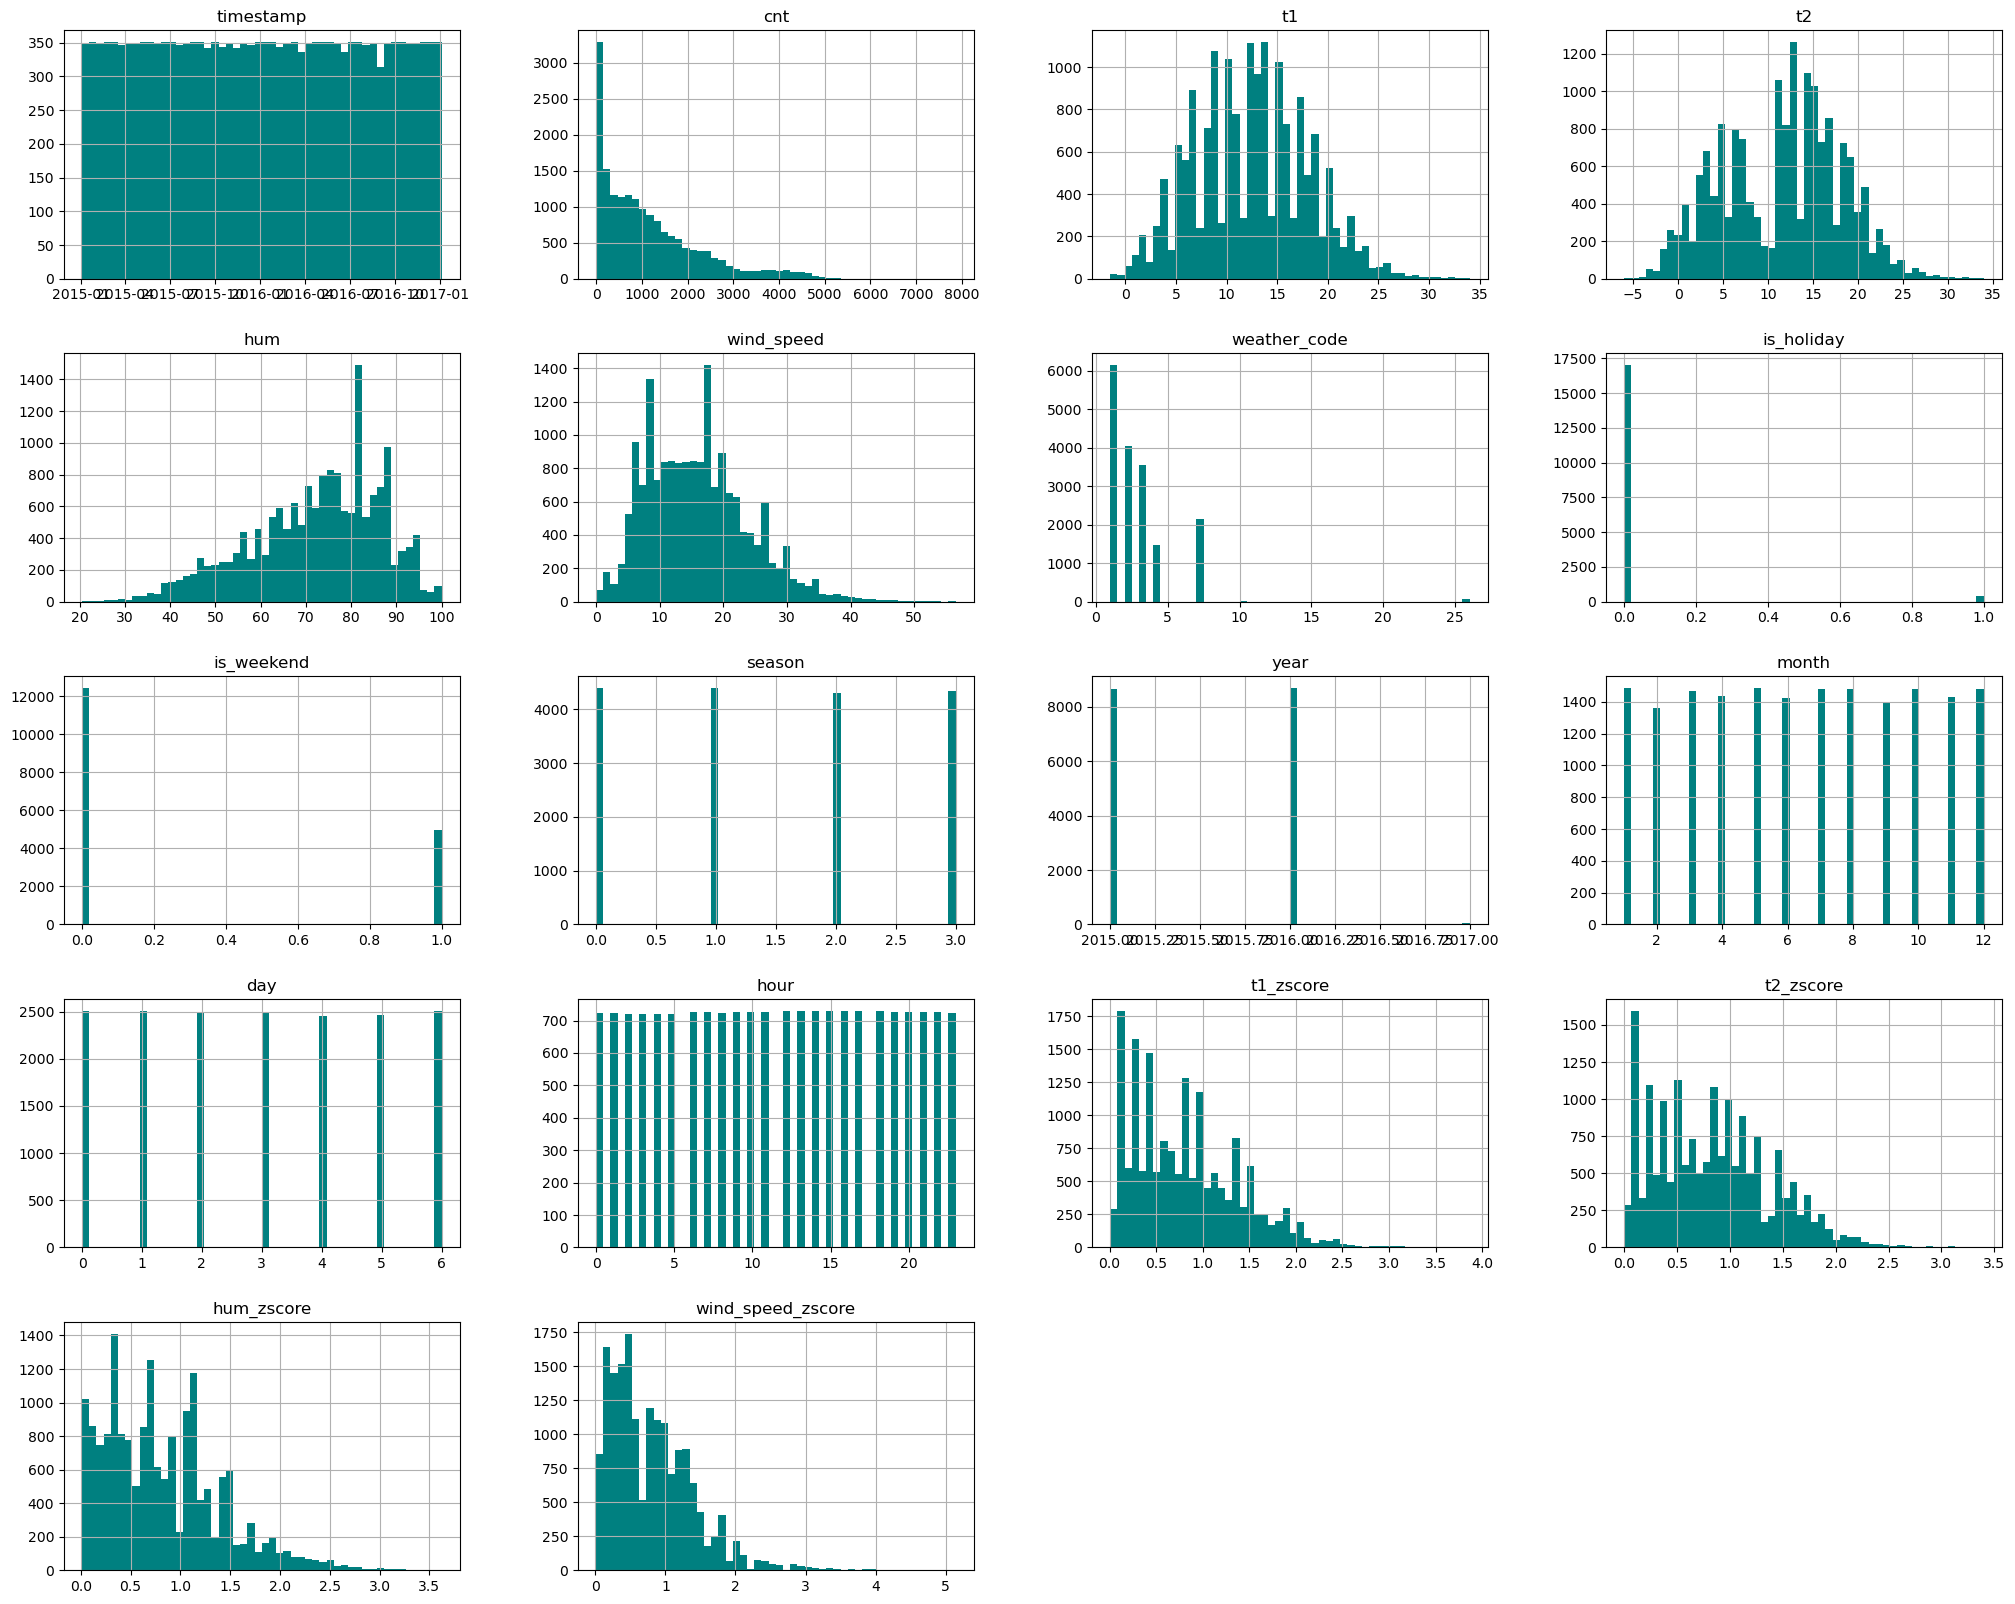

In [29]:
# initial histogram visualisations
%matplotlib inline

bike_df.hist(bins=50, figsize=(25,20), color = "teal");

plt.show()

<Axes: >

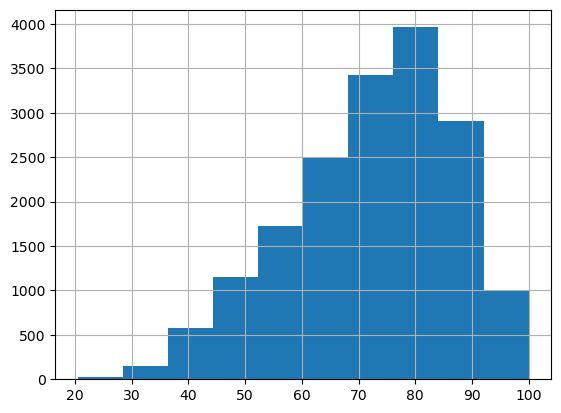

In [30]:
# ADDITION - Some graphs are more interesting than others
bike_df["hum"].hist()


For certain histogram such as this humidity histogram we can see the the data is skewed to the right. This tells us more about the context of the data. In this case we are looking at a relatively humid country, the UK. 

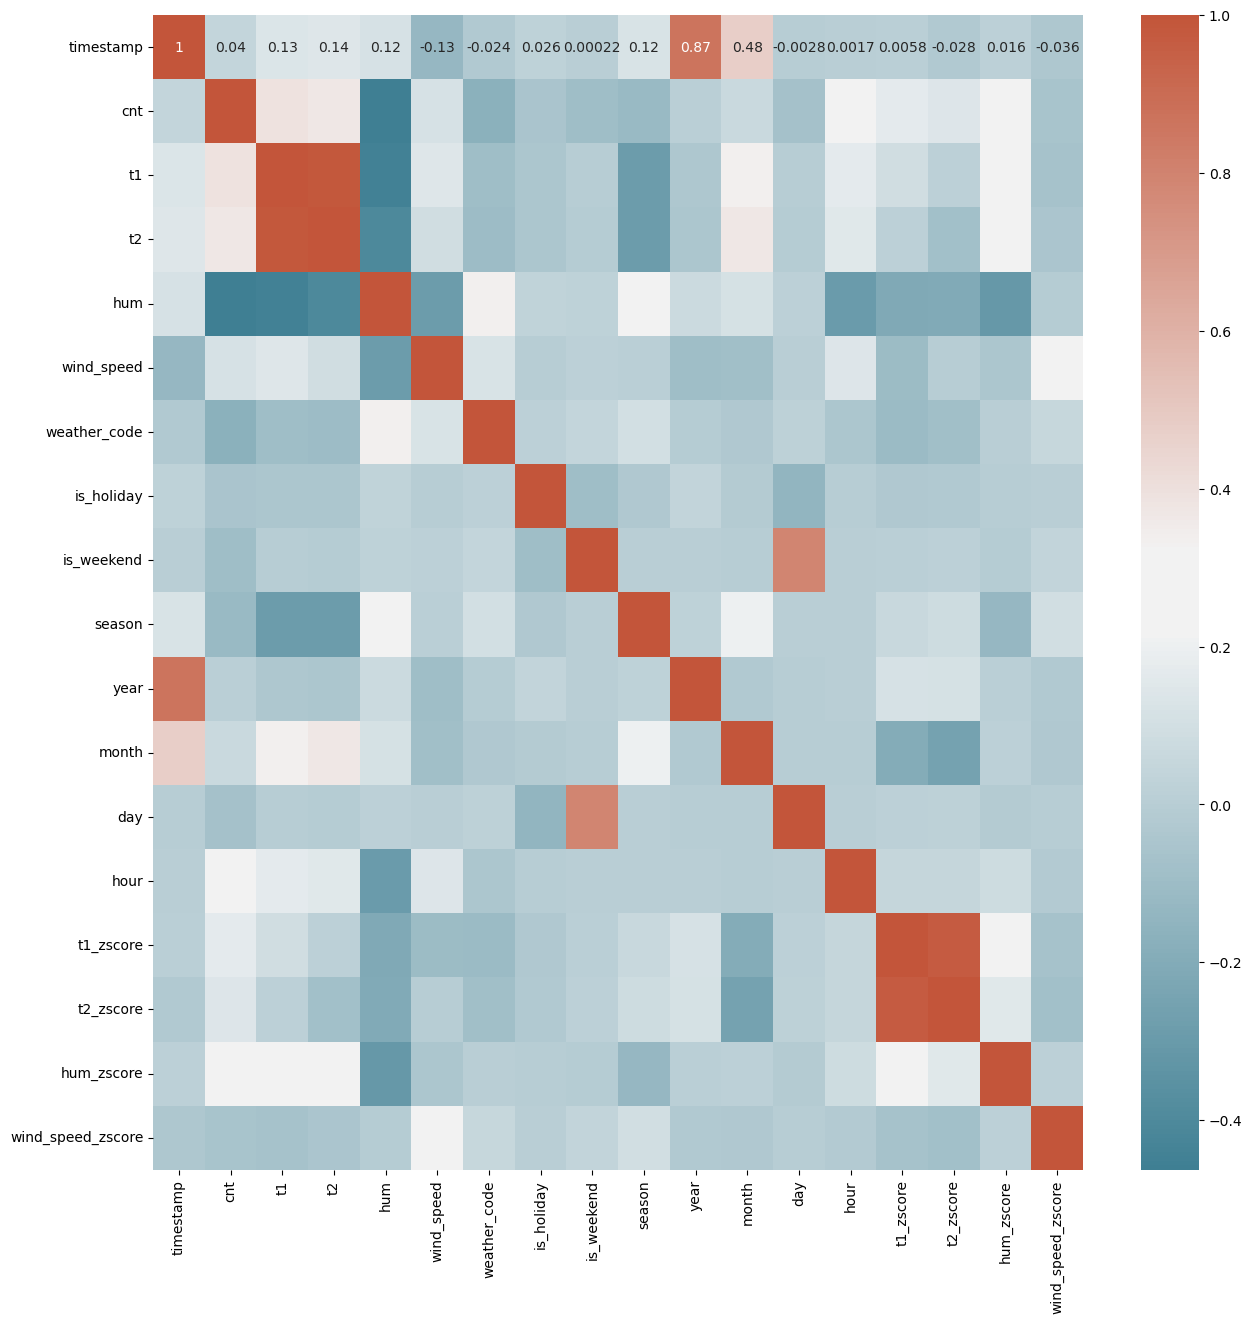

In [31]:
#creating a new dataframe that exlcudes object type columns

bike_df_corr = bike_df.drop(['weekday','month_name'], axis = 1)

# initial correlation matrix
corrheat = bike_df_corr.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrheat, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True));

Looking at this correlation map we do not see any clear and useful correlation between variables other than temperature and temperature (feels like) which is to be expected.


With this overview in mind, we explore the variables in greater detail.

### Overall demand

In a first step we explore the total number of bike-rentals across the time frame of two years.

In [32]:
#Adding columns for weeks and months per year
bike_df['date'] = pd.to_datetime(bike_df['timestamp']).dt.normalize()
bike_df['week-year'] = pd.to_datetime(bike_df['timestamp']).dt.strftime('%Y-%U')
bike_df['month-year'] = pd.to_datetime(bike_df['timestamp']).dt.strftime('%Y-%m')
bike_df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  ...  day  weekday hour  t1_zscore  \
0         0.0         1.0     3.0  ...    6   Sunday    0   1.699331   
1         0.0         1.0     3.0  ...    6   Sunday    1   1.699331   
2         0.0         1.0     3.0  ...    6   Sunday    2   1.789071   
3         0.0         1.0     3.0  ...    6   Sunday    3   1.878811   
4         0.0         1.0     3.0  ...    6   Sunday    4   1.878811   

  t2_zscore  hum_zscore  wind_speed_zscore       date  week-year  month-year  
0  1.439290    1.444517           1.255717 2015-01-04    2015-01     2015-01  
1  1.363703    1.444517           1.382390 2015-01-04    2015-01     2015-01  
2  1.363703    1.689054           2.015755 2015-01-04    2015-01     2015-01  
3  1.439290    1.933590           2.015755 2015-01-04    2015-01     2015-01  
4  1.741635    1.444517           1.192381 2015-01-04    2015-01     2015-01  

[5 rows x 23 columns]

When performing group operations (e.g., total rentals per week or average temperature per month), having pre-processed date fields like these makes the analysis more straightforward.

These columns enable efficient filtering, such as finding all rows from a specific week, month, or day without needing to manipulate the timestamp each time allowing for seasonality analysis.

<Axes: xlabel='week-year'>

Text(0.5, 0, 'Week of Year')

Text(0, 0.5, 'Total number of bike rentals')

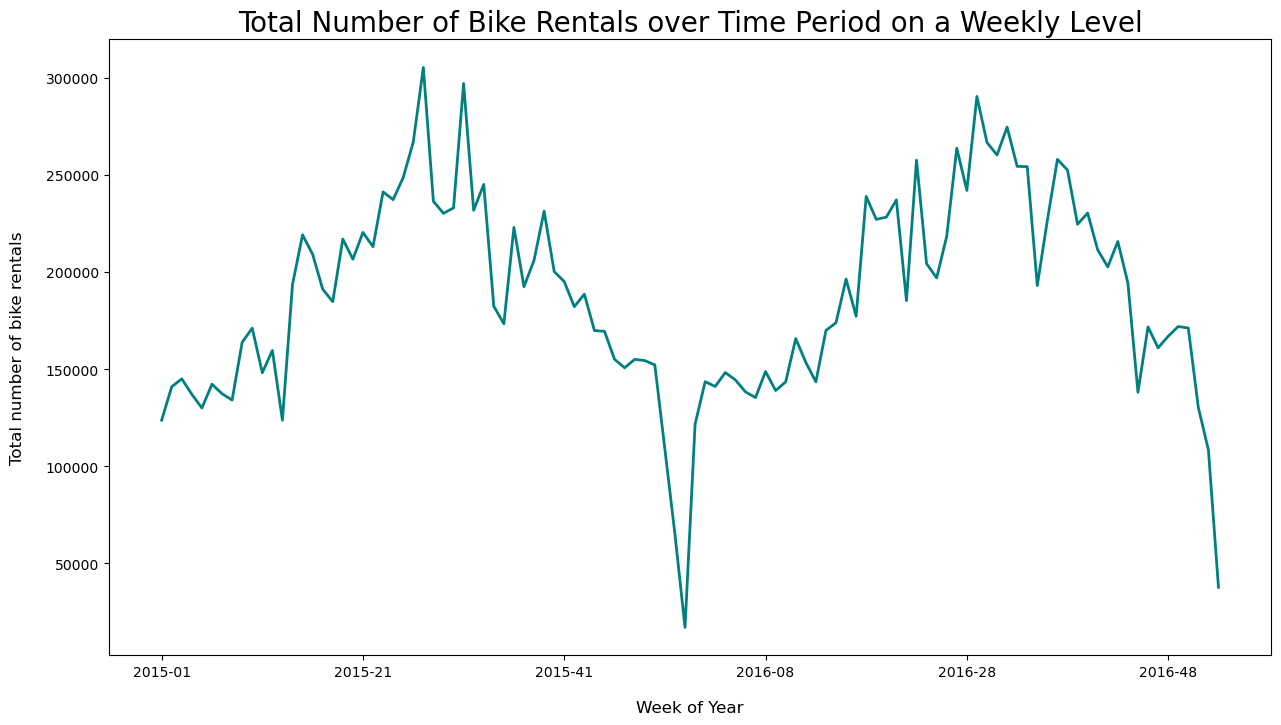

In [33]:
# Plot total number of bike rentals per week over time period
bike_df.groupby('week-year')['cnt'].sum().plot(kind='line', figsize=(15,8), color="teal",  linewidth=2)

#set title
plt.title('Total Number of Bike Rentals over Time Period on a Weekly Level', fontsize = 20).set_position([.5, 1.02])

#set x-axis label
plt.xlabel('Week of Year', fontsize = 12, labelpad=15)

#set y-axis label
plt.ylabel('Total number of bike rentals', fontsize = 12, labelpad=15)

plt.show()

<Axes: xlabel='month-year'>

Text(0.5, 0, 'Month of Year')

Text(0, 0.5, 'Total Number of Bike Rentals')

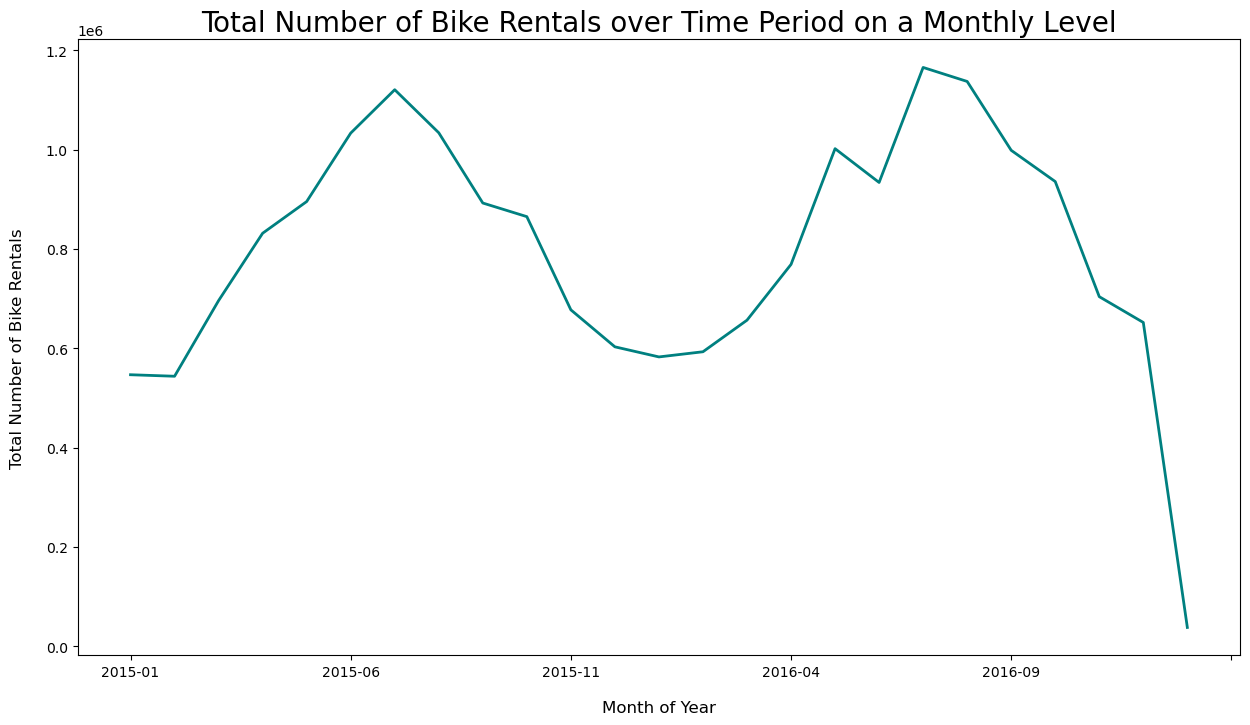

In [34]:
# Plot total number of bike rentals per month over time period

bike_df.groupby('month-year')['cnt'].sum().plot(kind='line', figsize=(15,8), color="teal",  linewidth=2)

#set title
plt.title('Total Number of Bike Rentals over Time Period on a Monthly Level', fontsize = 20).set_position([.5, 1.02])

#set x-axis label
plt.xlabel('Month of Year', fontsize = 12, labelpad=15)

#set y-axis label
plt.ylabel('Total Number of Bike Rentals', fontsize = 12, labelpad=15)

plt.show()

### Months


In [35]:
# Creating new dataset to group by month_name
df1 = bike_df[['cnt','month_name']].groupby(['month_name']).sum()
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1 = df1.reindex(month_index, axis=0)
df1 = df1.reset_index()
df1

month_name      cnt
0     January  1166837
1    February  1136504
2       March  1352461
3       April  1600427
4         May  1897348
5        June  1967130
6        July  2286214
7      August  2171265
8   September  1891097
9     October  1800752
10   November  1381191
11   December  1254746

<Axes: xlabel='month_name'>

(-1.0, 12.0)

([<matplotlib.axis.XTick at 0x23c4f2ad650>,
 [Text(0.0, 0, 'January'),
  Text(1.0, 0, 'February'),
  Text(2.0, 0, 'March'),
  Text(3.0, 0, 'April'),
  Text(4.0, 0, 'May'),
  Text(5.0, 0, 'June'),
  Text(6.0, 0, 'July'),
  Text(7.0, 0, 'August'),
  Text(8.0, 0, 'September'),
  Text(9.0, 0, 'October'),
  Text(10.0, 0, 'November'),
  Text(11.0, 0, 'December')])

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Number of Bike Rentals')

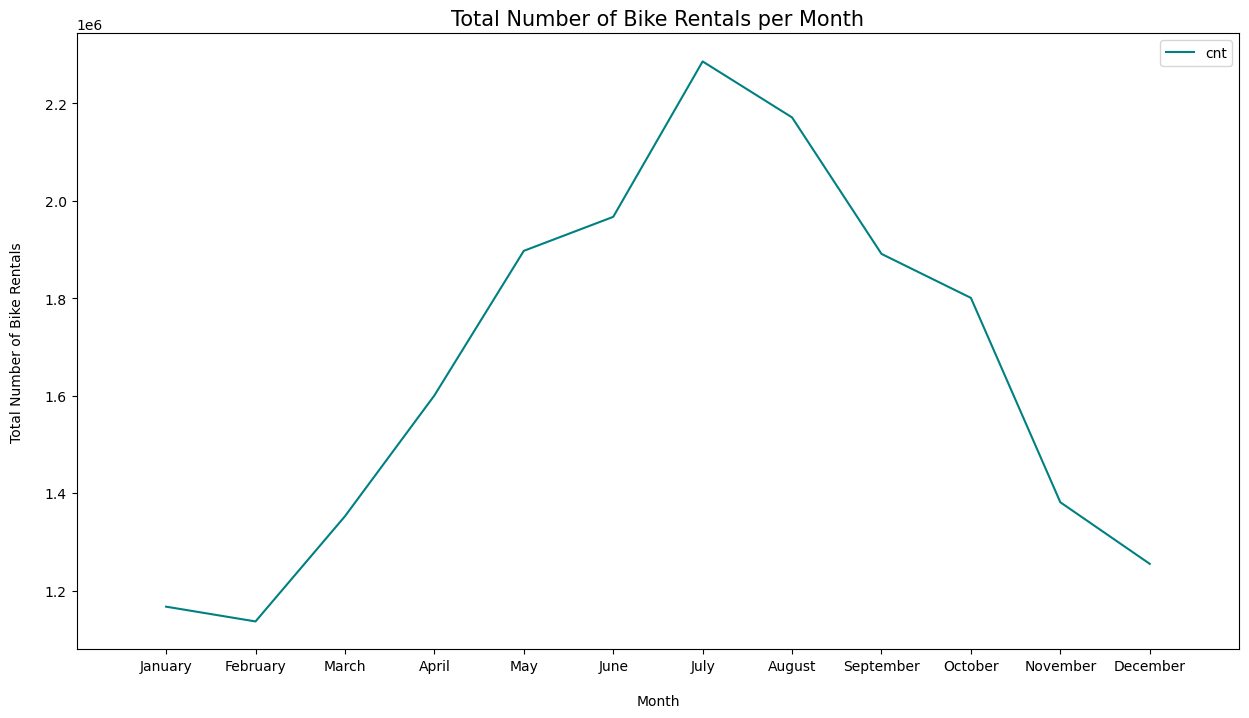

In [36]:
# Plot total number of bike rentals per month
df1.plot.line(x='month_name', y='cnt', rot =0, figsize=(15,8), color="teal") 

# setting x limits
plt.xlim(-1, 12);

# setting x ticks
labels = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
plt.xticks(np.linspace(0,12,12, endpoint=False), labels);

plt.title('Total Number of Bike Rentals per Month', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Month', fontsize = 10, labelpad=15)
plt.ylabel('Total Number of Bike Rentals', fontsize = 10, labelpad=15)
plt.show()

In [37]:
# Creating new dataset to group by month_name and calculating the average number of bike rentals
df2 = bike_df[['cnt','month_name']].groupby(['month_name']).mean().round(0).astype(int)
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df2 = df2.reindex(month_index, axis=0)
df2 = df2.reset_index()
df2 = df2.rename(columns={'cnt': 'daily average'})
df2

month_name  daily average
0     January            785
1    February            836
2       March            921
3       April           1113
4         May           1275
5        June           1383
6        July           1544
7      August           1463
8   September           1357
9     October           1218
10   November            966
11   December            846

<Axes: xlabel='month_name'>

(-1.0, 12.0)

([<matplotlib.axis.XTick at 0x23c4c647550>,
 [Text(0.0, 0, 'January'),
  Text(1.0, 0, 'February'),
  Text(2.0, 0, 'March'),
  Text(3.0, 0, 'April'),
  Text(4.0, 0, 'May'),
  Text(5.0, 0, 'June'),
  Text(6.0, 0, 'July'),
  Text(7.0, 0, 'August'),
  Text(8.0, 0, 'September'),
  Text(9.0, 0, 'October'),
  Text(10.0, 0, 'November'),
  Text(11.0, 0, 'December')])

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Daily Number of Bike Rentals')

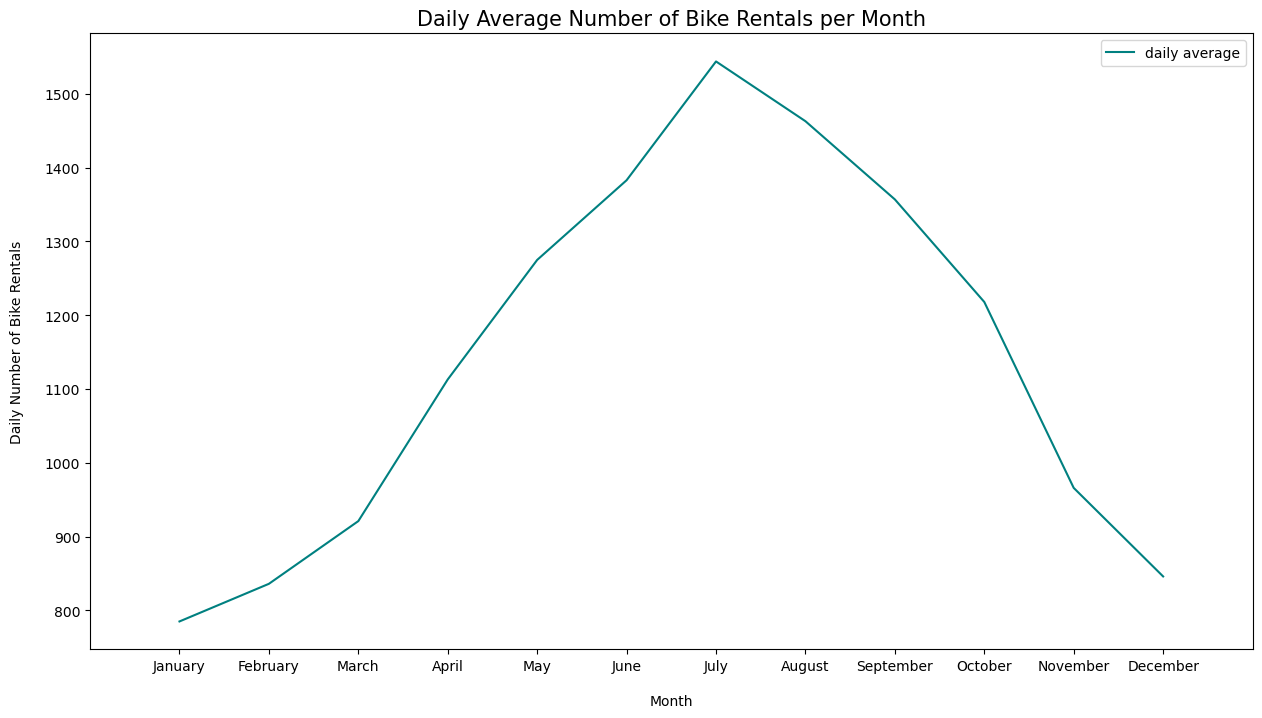

In [39]:
df2.plot.line(x='month_name', y='daily average', rot =0, figsize=(15,8), color = "teal") 

# setting x limits
plt.xlim(-1, 12);

# setting x ticks
labels = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
plt.xticks(np.linspace(0,12,12, endpoint=False), labels);

plt.title('Daily Average Number of Bike Rentals per Month', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Month', fontsize = 10, labelpad=15)
plt.ylabel('Daily Number of Bike Rentals', fontsize = 10, labelpad=15)
plt.show()

From these charts we can observe that the number of bike-rentals is the lowest during winter and peaks during the summer months. 

<Figure size 3000x700 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Bike Rentals')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

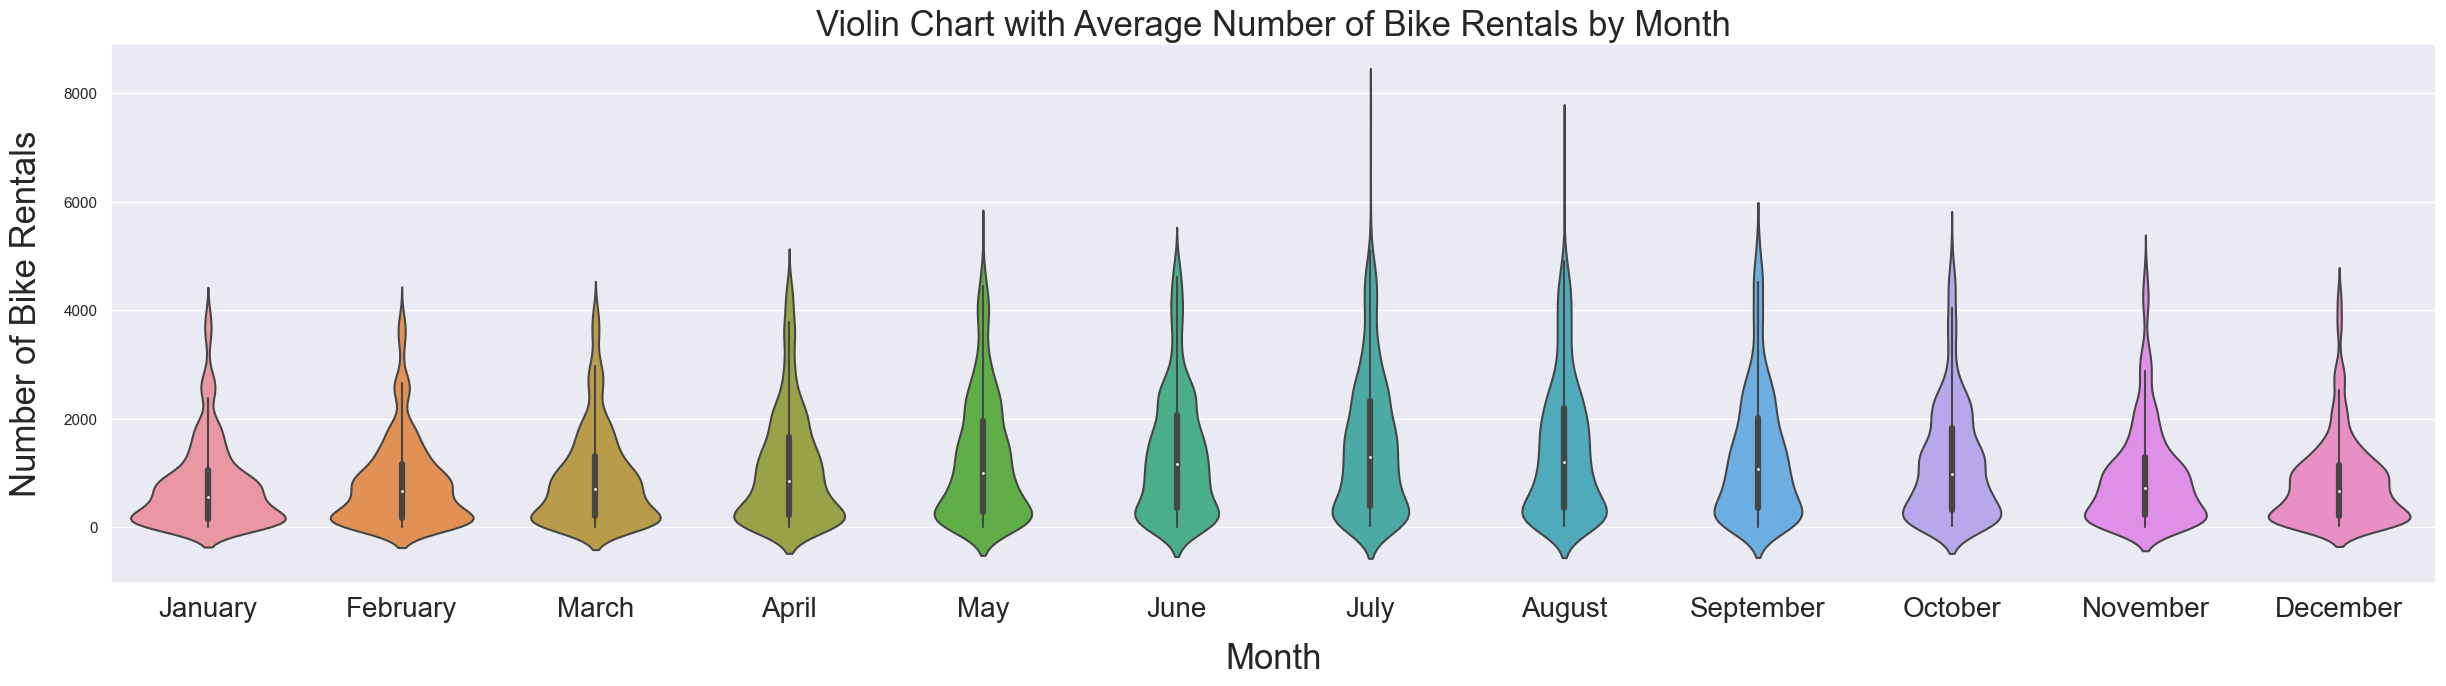

In [40]:
# violin plot
plt.figure(figsize = (30,7))
sns.set(rc={'font.size': 35, 'axes.titlesize': 35, 'axes.labelsize':35})
x=sns.violinplot(x='month_name', y='cnt', data=bike_df)
plt.title('Violin Chart with Average Number of Bike Rentals by Month', fontsize = 25).set_position([.5, 1.02])
plt.xlabel('Month', fontsize = 25, labelpad=15)
plt.ylabel('Number of Bike Rentals', fontsize = 25, labelpad=15)
x.set_xticklabels(x.get_xticklabels(), rotation=0, fontsize=20)

plt.show()

In the Violin Plot we can see the distribution and density of months. We can conclude that the number of bike-rentals is concentrated in a lower level in winter months, while the summer months are less concentrated. The increase variation in summer months could be explained by the fact that temperatures are on average higher and only the weather - rain or no rain will dictate whether someone might rent a bike. Whislt in winter months, even if it is sunnny, due to the colder temperatures people will be less likely to rent a bike.  

For the bike rental businesses this means less revenue but more predictable revenue in winter months. Summer months provide higher revenues however less predictable on a day to day basis. 

### Weekdays

In [41]:
# Creating new dataset to group by weekdays
df3 = bike_df[['cnt','weekday']].groupby(['weekday']).mean().round(0).astype(int)
month_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df3 = df3.reindex(month_index, axis=0)
df3 = df3.rename(columns={'cnt': 'daily average'})
df3 = df3.reset_index()
df3

weekday  daily average
0     Monday           1130
1    Tuesday           1230
2  Wednesday           1244
3   Thursday           1259
4     Friday           1183
5   Saturday            996
6     Sunday            960

<Axes: xlabel='weekday'>

(-1.0, 7.0)

([<matplotlib.axis.XTick at 0x23c5835ecd0>,
 [Text(0.0, 0, 'Monday'),
  Text(1.0, 0, 'Tuesday'),
  Text(2.0, 0, 'Wednesday'),
  Text(3.0, 0, 'Thursday'),
  Text(4.0, 0, 'Friday'),
  Text(5.0, 0, 'Saturday'),
  Text(6.0, 0, 'Sunday')])

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Average Number of Bike Rentals')

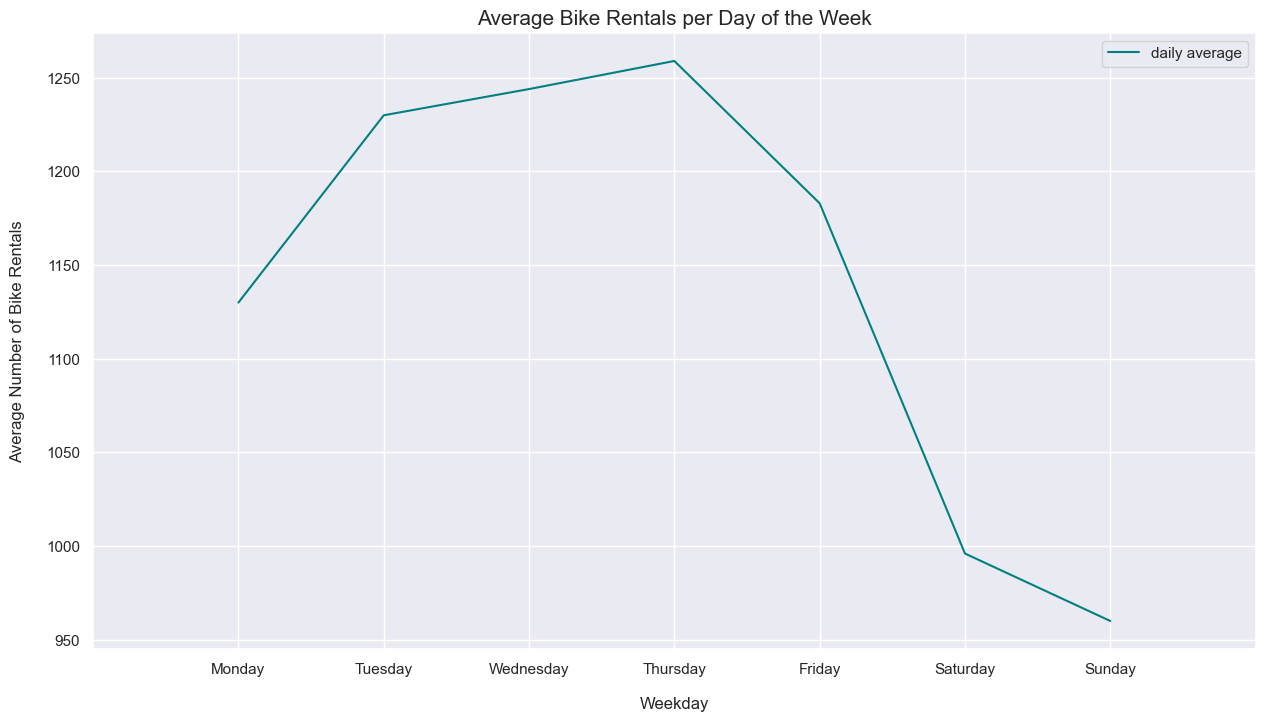

In [42]:
# Plot average number of bike rentals per weekday
df3.plot.line(x='weekday', y='daily average', rot =0, figsize=(15,8), color = "teal") 

# setting x limits
plt.xlim(-1, 7);

# setting x ticks
labels = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
plt.xticks(np.linspace(0,7,7,endpoint=False), labels);

plt.title('Average Bike Rentals per Day of the Week', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Weekday', fontsize = 12, labelpad=15)
plt.ylabel('Average Number of Bike Rentals', fontsize = 12, labelpad=15)
plt.show()

Our exploration so far showed that on average bike hires are the lowest during the weekend. One hypothesis for this is that customers use the bikes during the week to go to work. To prove this hypothesis, we look at the time of day the bikes are used the most. The plateu between Tuesday and Thursday can be explain by people going on long weekenk holidays, taking Monday and/or Friday off. Furthermore, these could also be be the most popular work from home days. 

<Axes: xlabel='hour', ylabel='cnt'>

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Number of Bike Rentals')

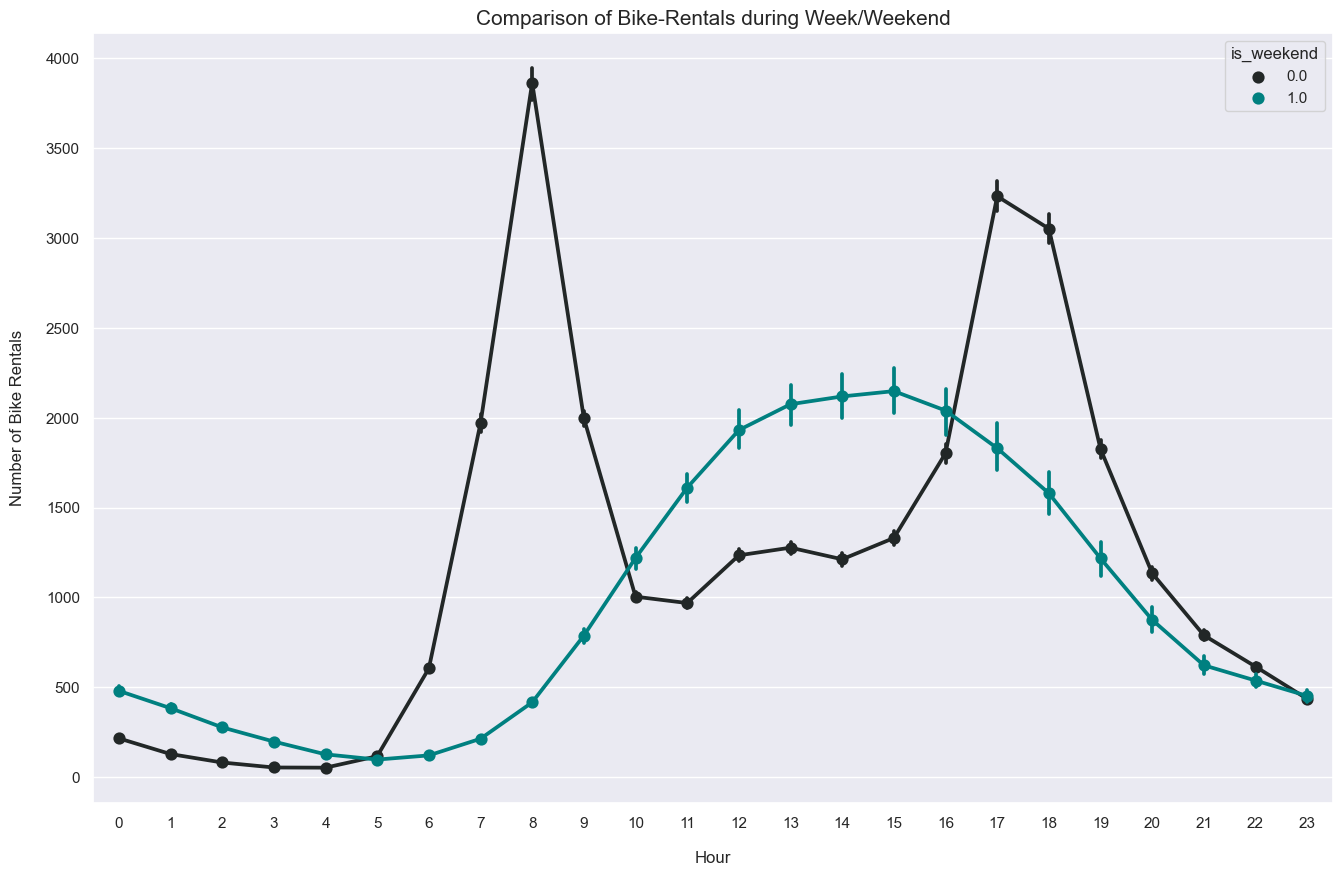

In [43]:
fig1,(ax1)= plt.subplots(nrows=1)
fig1.set_size_inches(16,10)

sns.set_palette("Paired")
sns.pointplot(x='hour', y='cnt', hue='is_weekend', data=bike_df, ax=ax1, color = "teal")

plt.title('Comparison of Bike-Rentals during Week/Weekend', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Hour', fontsize = 12, labelpad=15)
plt.ylabel('Number of Bike Rentals', fontsize = 12, labelpad=15)

We can clearly see the hourly line graph trend spikes around 7:30am  and 17/18pm for week days proving our hypothesis that rental bikes are often used for commuting.  

### Holiday

<Axes: xlabel='is_holiday'>

Text(0.5, 0, 'Holiday')

Text(0, 0.5, 'Number of Bike Rentals')

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

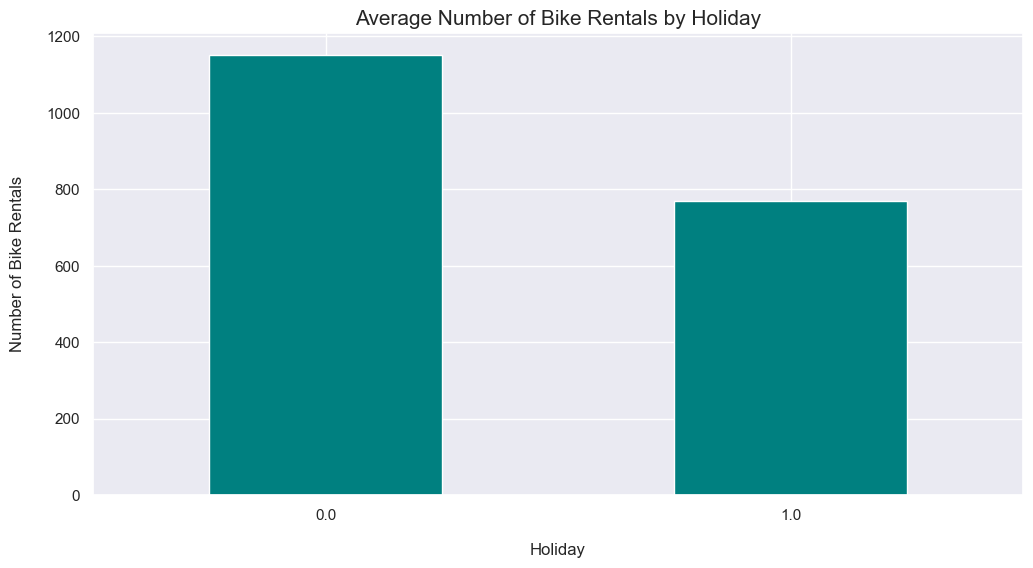

In [44]:
# Plot average number of biker rentals depending on holiday
bike_df.groupby('is_holiday')['cnt'].mean().plot.bar(figsize=(12,6), color = "teal")
plt.title('Average Number of Bike Rentals by Holiday', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Holiday', fontsize = 12, labelpad=15)
plt.ylabel('Number of Bike Rentals', fontsize = 12, labelpad=15)
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='hour', ylabel='cnt'>

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Number of Bike Rentals')

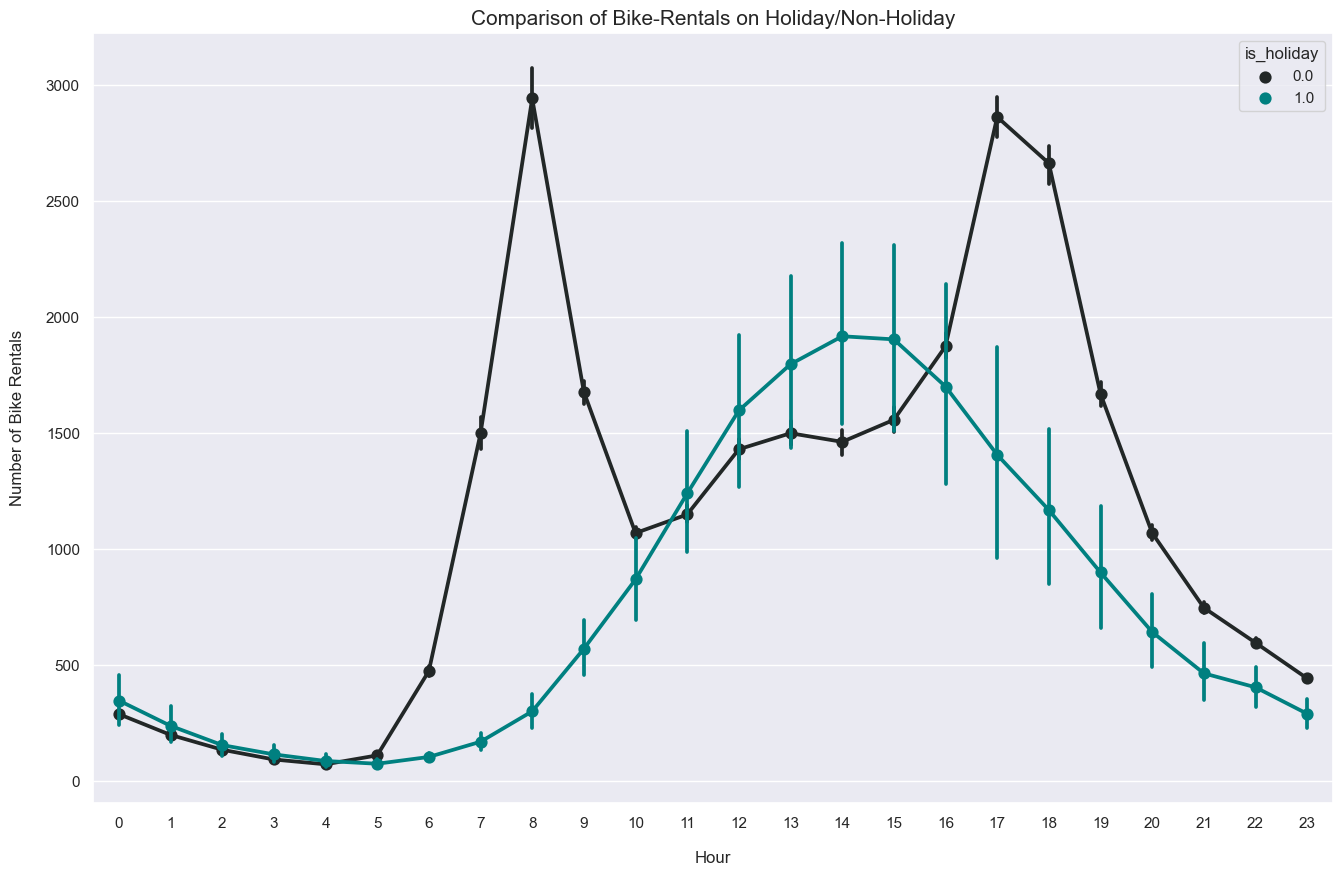

In [45]:
fig2,(ax2)= plt.subplots(nrows=1)
fig2.set_size_inches(16,10)

sns.set_palette("Paired")
sns.pointplot(x='hour', y='cnt', hue='is_holiday', data=bike_df, ax=ax2, color = "teal")

plt.title('Comparison of Bike-Rentals on Holiday/Non-Holiday', fontsize = 15).set_position([.5, 1.02])
plt.xlabel('Hour', fontsize = 12, labelpad=15)
plt.ylabel('Number of Bike Rentals', fontsize = 12, labelpad=15)

[Text(0.5, 0, 'hour'), Text(0, 0.5, 'count')]

[Text(0.5, 0, 'hour'), Text(0, 0.5, 'count')]

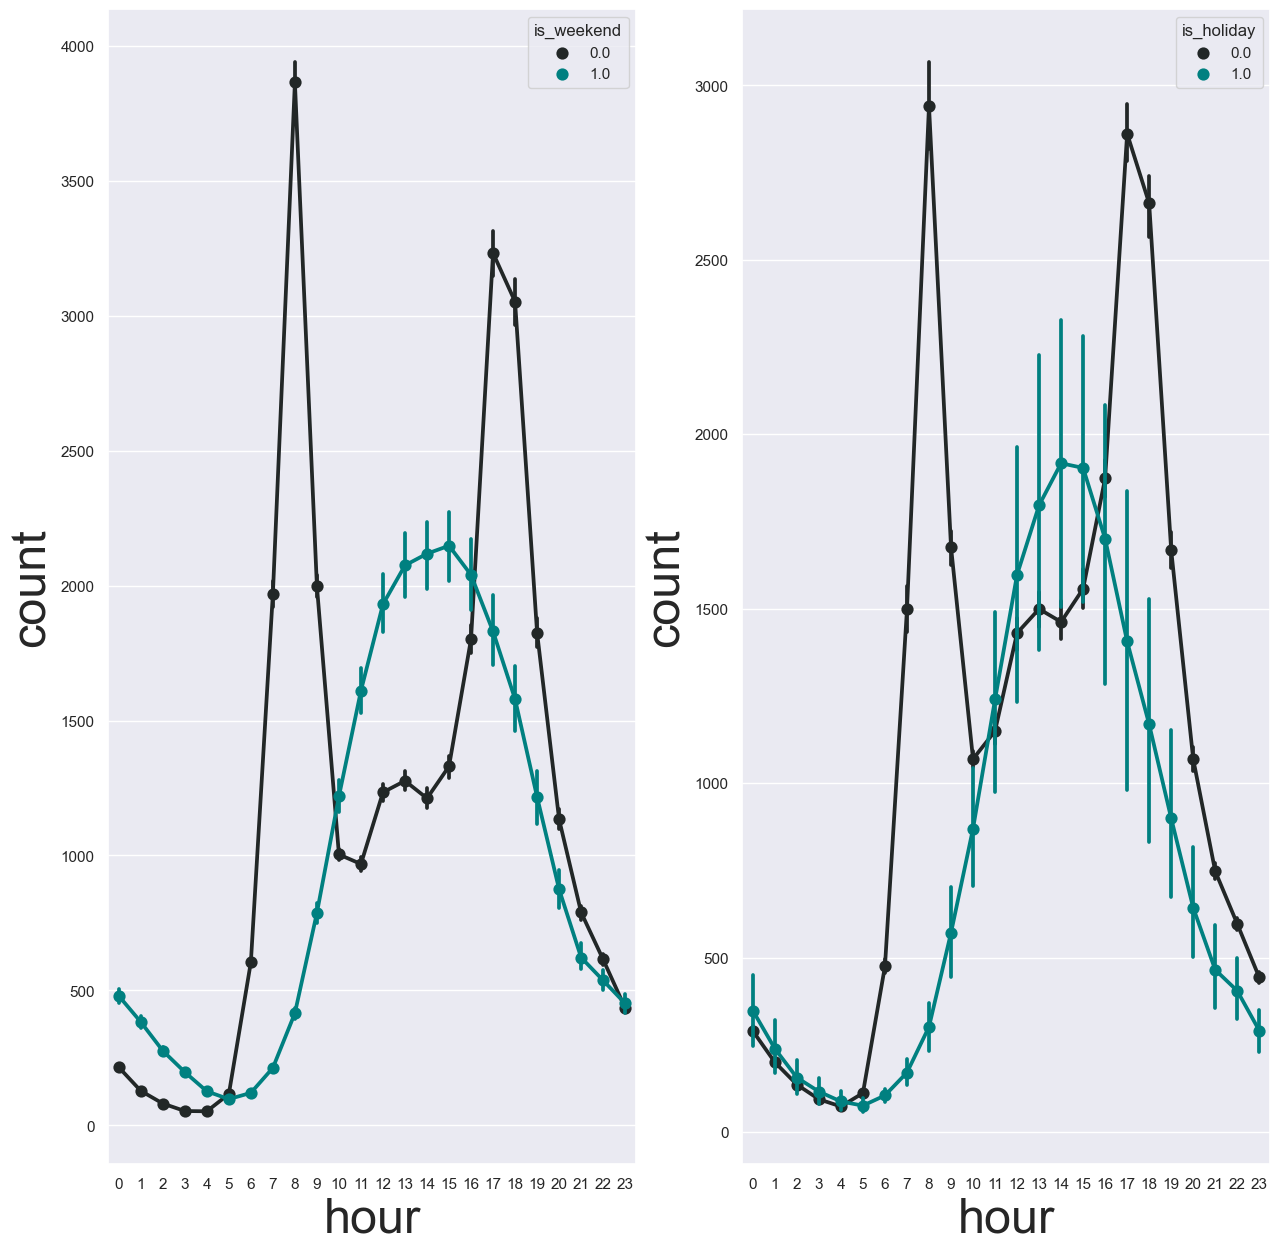

In [46]:
#Plotting holiday and weekend plots next to each other

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

sns.set_palette("Paired")
ax1 = sns.pointplot(x='hour', y='cnt', hue='is_weekend', data=bike_df, ax=ax1, color = "teal")
ax1.set(xlabel='hour', ylabel='count')

ax2 = sns.pointplot(x='hour', y='cnt', hue='is_holiday', data=bike_df, ax=ax2, color = "teal")
ax2.set(xlabel='hour', ylabel='count')

plt.show() # stops the display of multiple outputs

### Time of the day

In [47]:
# Creating new dataset to group by hour average
df4 = bike_df[['cnt','hour']].groupby(['hour']).mean().round(0).astype(int)
df4 = df4.reindex(axis=0)
df4 = df4.rename(columns={'cnt': 'daily average'})
df4 = df4.reset_index()
df4.head(23)

hour  daily average
0      0            291
1      1            201
2      2            136
3      3             94
4      4             73
5      5            111
6      6            467
7      7           1469
8      8           2883
9      9           1653
10    10           1065
11    11           1151
12    12           1434
13    13           1506
14    14           1472
15    15           1565
16    16           1870
17    17           2830
18    18           2629
19    19           1652
20    20           1060
21    21            741
22    22            592

<Axes: xlabel='hour'>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Number of Bike Rentals')

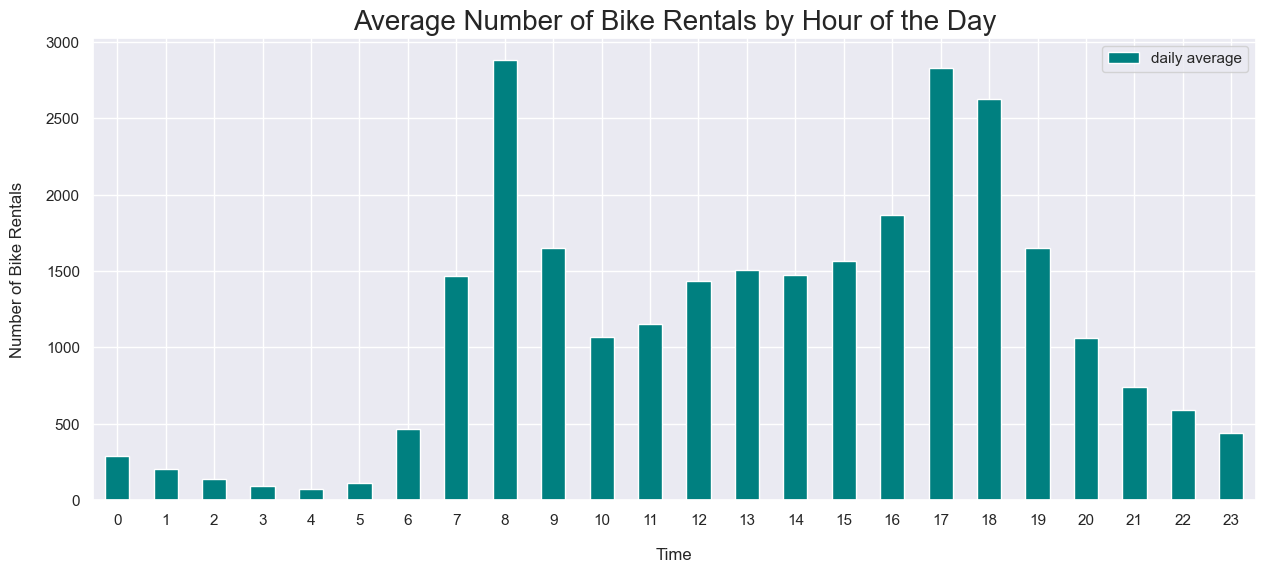

In [48]:
# Plotting average number of bike rentals during the day 
df4.plot.bar(x='hour', y='daily average', rot =0, figsize=(15,6), color = "teal") 
plt.title('Average Number of Bike Rentals by Hour of the Day', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Time', fontsize = 12, labelpad=15)
plt.ylabel('Number of Bike Rentals', fontsize = 12, labelpad=15)
plt.show()

In conclusion, the comparison graphs and the bar chart above show that there is a peak in demand of bike-rentals during the morning and the evening during the week. On the weekends and holidays, however, demand seems to peak in the early afternoon. Hence, we can conclude that people use bikes to commute to and from work or for leisure on the weekends.

### Temperature

<Axes: xlabel='t1'>

Text(0.5, 0, 'Temerature in Celsius (Actual)')

Text(0, 0.5, 'Total Number of Bike Rentals')

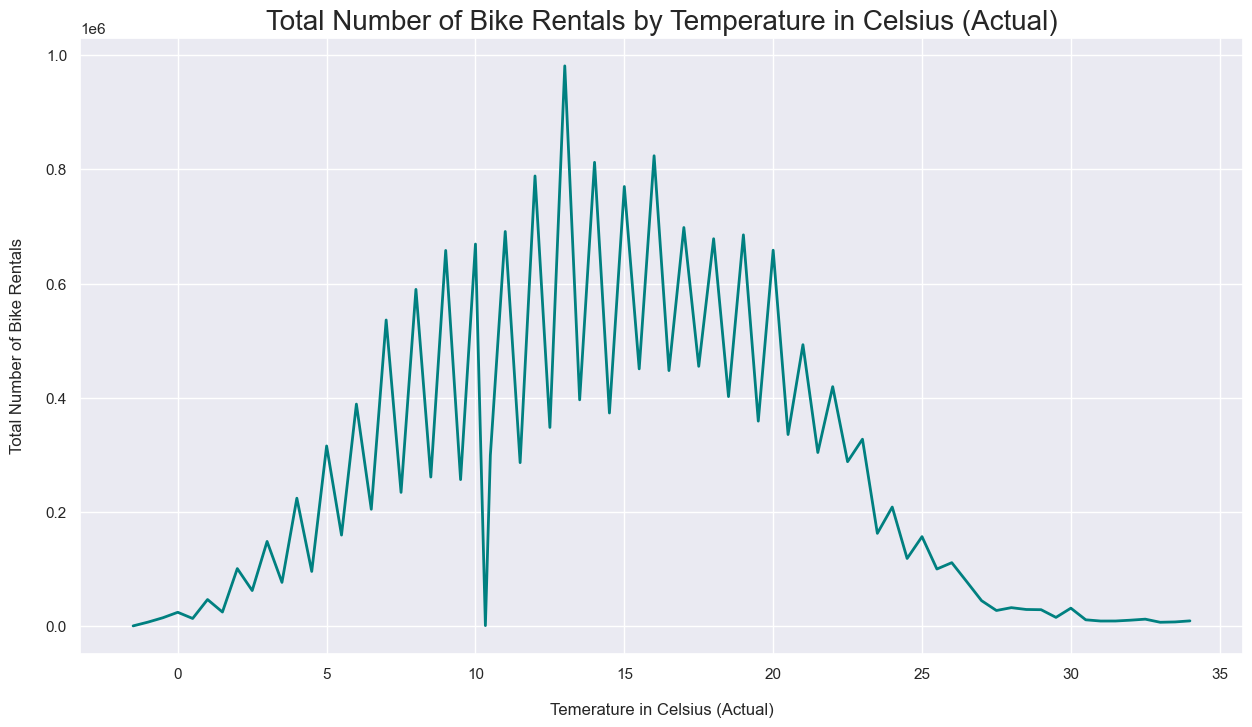

In [49]:
#Plot total numbers of bike rentals by temperature in Celsius
bike_df.groupby('t1')['cnt'].sum().plot(kind='line', figsize=(15,8), color = "teal",  linewidth=2)
plt.title('Total Number of Bike Rentals by Temperature in Celsius (Actual)', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Temerature in Celsius (Actual)', fontsize = 12, labelpad=15)
plt.ylabel('Total Number of Bike Rentals', fontsize = 12, labelpad=15)
plt.show()

Looking at the total numbers of bike-rentals by temperature in celsius, we can see that most bikes were rented when the temperature was between 12 and 20 degrees celsius. This makes sense if we look at the overall temperature in London:

<Axes: xlabel='month-year'>

Text(0.5, 0, 'Time Period')

Text(0, 0.5, 'Temperature in Celsius')

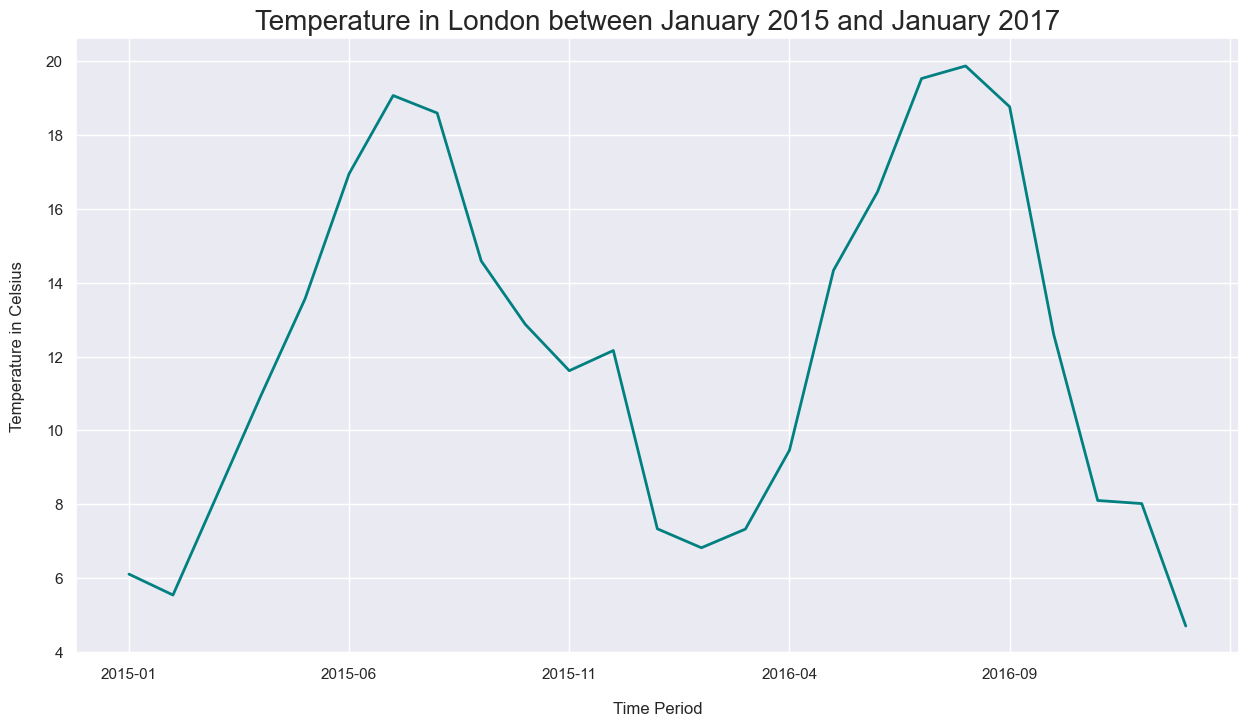

In [50]:
#Plot temperature per month in time frame
bike_df.groupby('month-year')['t1'].mean().plot(kind='line', figsize=(15,8), color = "teal",  linewidth=2)
plt.title('Temperature in London between January 2015 and January 2017', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Time Period', fontsize = 12, labelpad=15)
plt.ylabel('Temperature in Celsius', fontsize = 12, labelpad=15)
plt.show()

The above graph shows that the average temperature in London does not exceed 20 degrees celsius. 
<br><br>
To get a better understanding between the relationship of the number of bike-rentals and the temperature, we looked at the average number of bike-rentals by temperature.

<Axes: xlabel='t1'>

Text(0.5, 0, 'Temperature in Celsius')

Text(0, 0.5, 'Average Number of Bike Rentals')

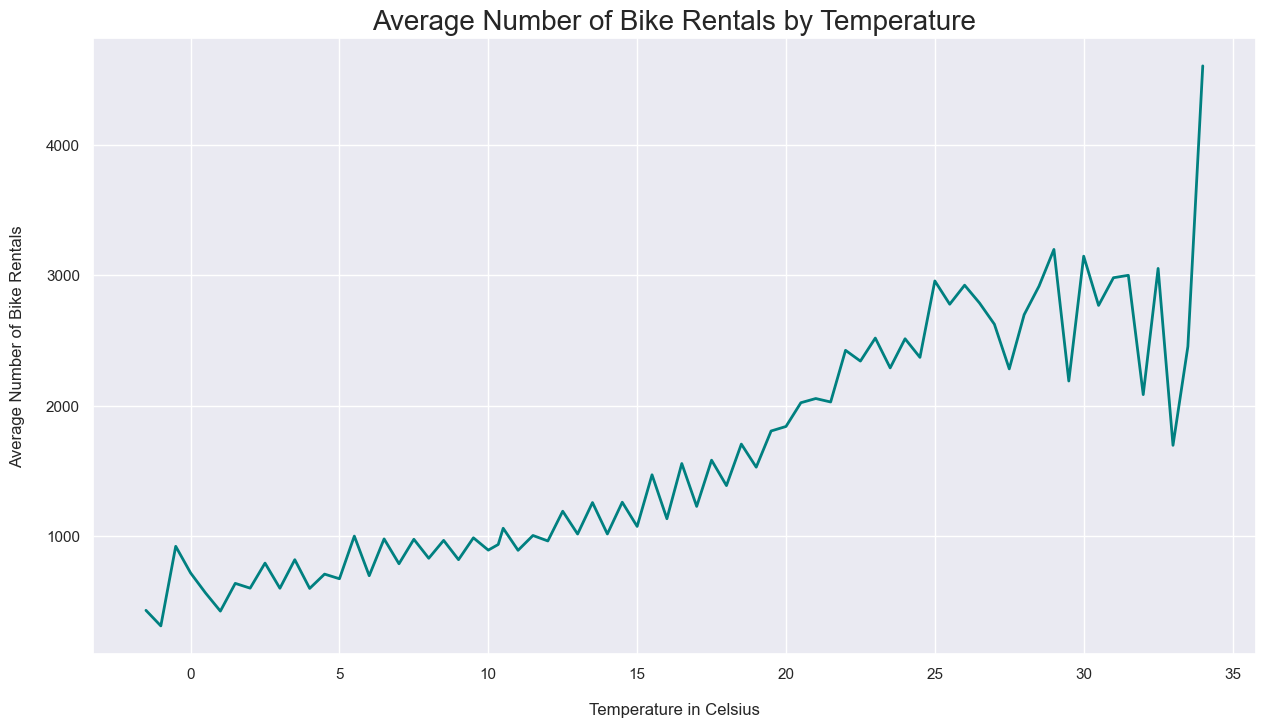

In [51]:
#Plot average numbers of bike rentals by temperature
bike_df.groupby('t1')['cnt'].mean().plot(kind='line', figsize=(15,8), color = "teal",  linewidth=2)
plt.title('Average Number of Bike Rentals by Temperature', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Temperature in Celsius', fontsize = 12, labelpad=15)
plt.ylabel('Average Number of Bike Rentals', fontsize = 12, labelpad=15)
plt.show()

The results show a clear relationship between the average number of bike-rentals and temperature. 

### Windspeed

<Axes: xlabel='wind_speed'>

Text(0.5, 0, 'Wind speed')

Text(0, 0.5, 'Average number of bike rentals')

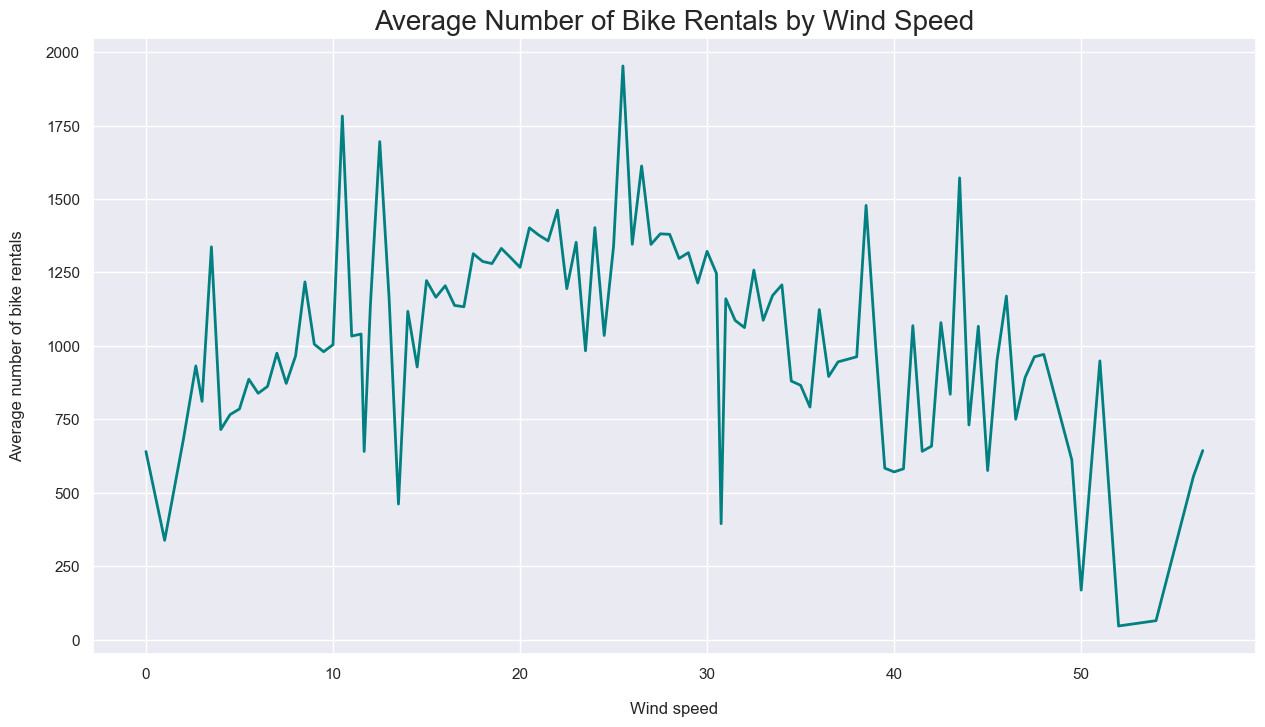

In [52]:
# Plot average number of bike rentals depending on the wind speed'
bike_df.groupby('wind_speed')['cnt'].mean().plot(kind='line', figsize=(15,8), color = "teal",  linewidth=2)
plt.title('Average Number of Bike Rentals by Wind Speed', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Wind speed', fontsize = 12, labelpad=15)
plt.ylabel('Average number of bike rentals', fontsize = 12, labelpad=15)
plt.show()

When analyzing the demand by windspeed we can notice that at higher windspeeds on average less bikes are being rented as it is more difficult to cycle in windy conditions. 

### Humidity

<Axes: xlabel='hum'>

Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Average number of bike rentals')

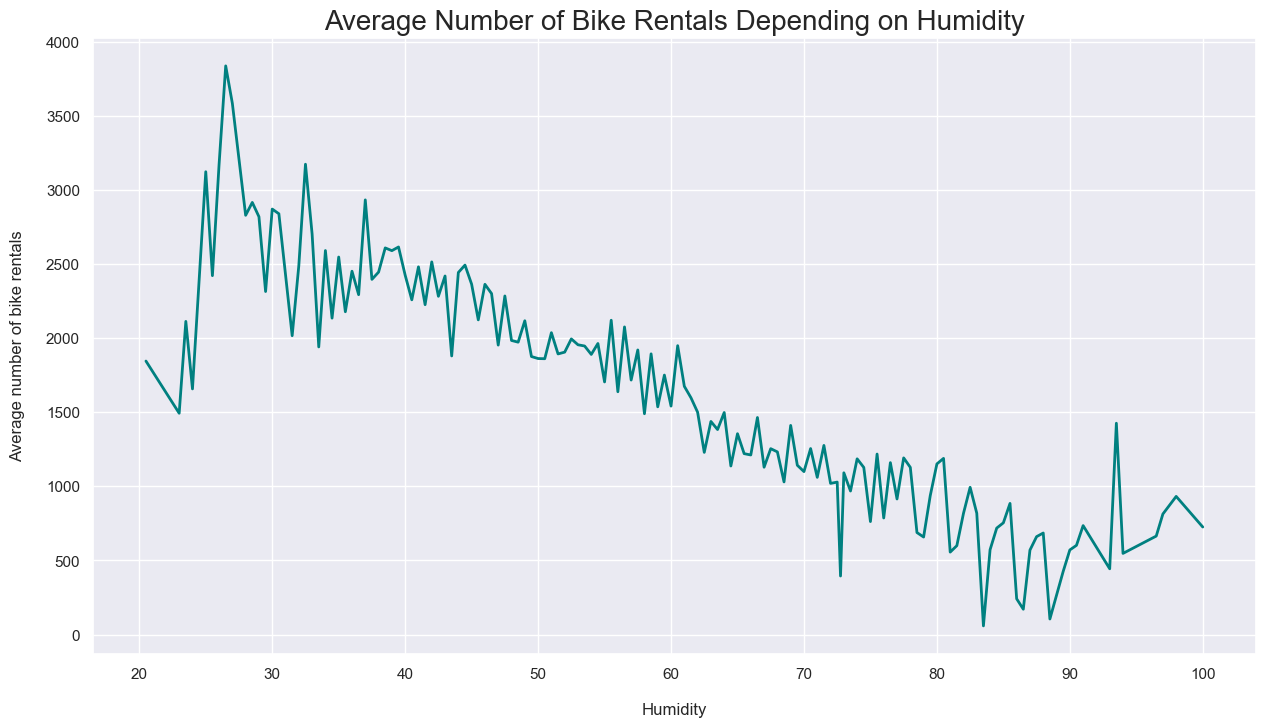

In [53]:
# Plot average number of bike rentals depending on thumidity'
bike_df.groupby('hum')['cnt'].mean().plot(kind='line', figsize=(15,8), color = "teal",  linewidth=2)
plt.title('Average Number of Bike Rentals Depending on Humidity', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Humidity', fontsize = 12, labelpad=15)
plt.ylabel('Average number of bike rentals', fontsize = 12, labelpad=15)
plt.show()

<Axes: xlabel='month-year'>

Text(0.5, 0, 'Time Period')

Text(0, 0.5, 'Wind Speed')

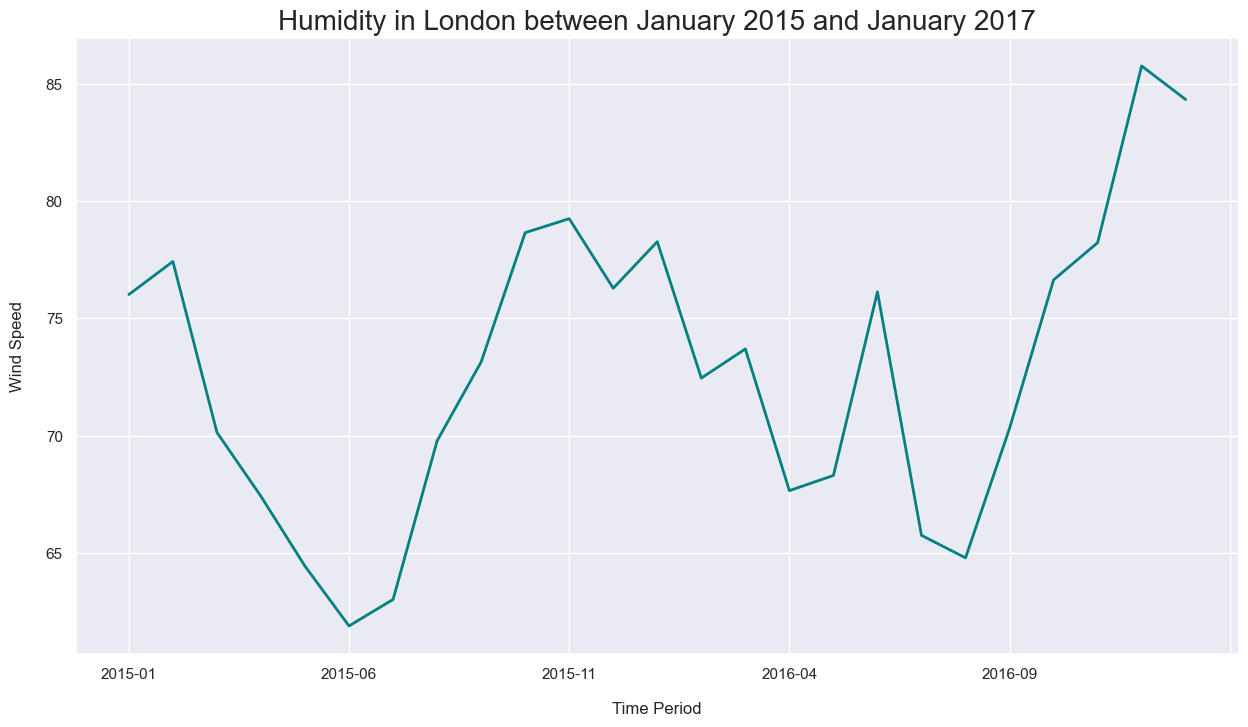

In [54]:
#Plot windspeed per month in time frame
bike_df.groupby('month-year')['hum'].mean().plot(kind='line', figsize=(15,8), color = "teal",  linewidth=2)
plt.title('Humidity in London between January 2015 and January 2017', fontsize = 20).set_position([.5, 1.02])
plt.xlabel('Time Period', fontsize = 12, labelpad=15)
plt.ylabel('Wind Speed', fontsize = 12, labelpad=15)
plt.show()

When analyzing the correlation between the demand of bike-rentals and humidity, we can observe a clear trend. Demand is highest when humidity is the lowest which is relate humidity increasing in rainy weather conditions.

In [55]:
data_w = bike_df[["t1", "wind_speed", "hum", "cnt"]]

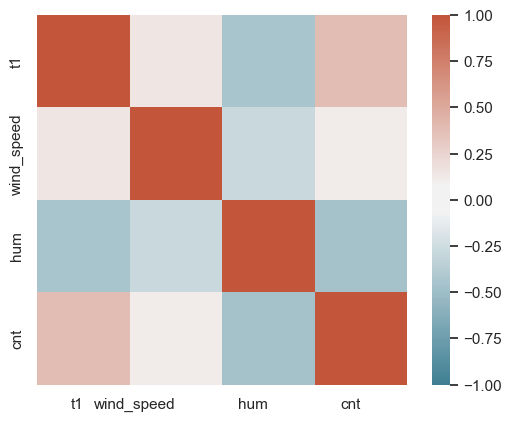

In [56]:
corr = data_w.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);

Looking at the correlation between the variables concerning weather, we observe a negative correlation between humidity (hum) and the temperature (t1). Hence, we cannot say with confidence whether the temperature or humidity drives demand. Moreover, we can see a positive correlation between temperature and number of bike-rentals (cnt), and a negative correlation between humidity and the number of bike-rentals. This supports our earlier findings.

We decided not to further explore the variable <i>weather_code</i>, <i>season</i> and <i>is_weekend</i> because their effects can be seen through other variables and they do not provide us with additional information.

### 4.2.2 Outliers

Text(0.5, 46.94444444444446, 'Year')

Text(34.19444444444444, 0.5, 'Count of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Year')

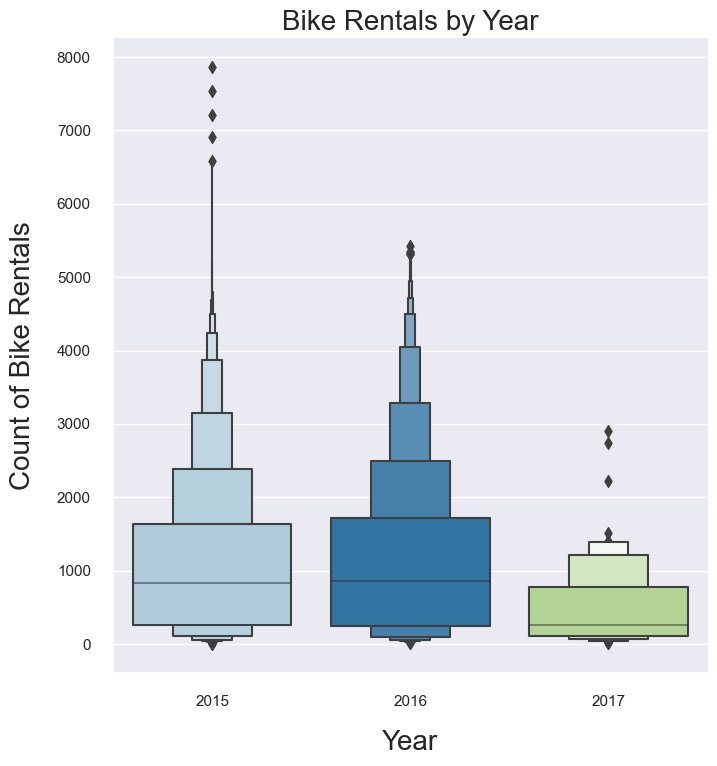

In [57]:
sns.catplot(x="year", y="cnt", kind="boxen",
            data=bike_df.sort_values("year"));

# changing label names
plt.xlabel("Year", fontsize=20, labelpad=15)
plt.ylabel("Count of Bike Rentals", fontsize=20, labelpad=15)

# adding graph title 
plt.title("Bike Rentals by Year", fontsize=20)

# changing the size of the graph
plt.gcf().set_size_inches(10, 10)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

The above graph could be misleading as the data does not provide a full year of 2017 data.

In [58]:

# Create a dictionary mapping numbers to three-letter month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map the 'month' column from numerical to three-letter month names
bike_df['month'] = bike_df['month'].map(month_mapping)

day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map the 'day' column from numerical to day names
bike_df['day'] = bike_df['day'].map(day_mapping)

Text(0.5, 46.94444444444446, 'Month')

Text(34.19444444444444, 0.5, 'Count of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Month')

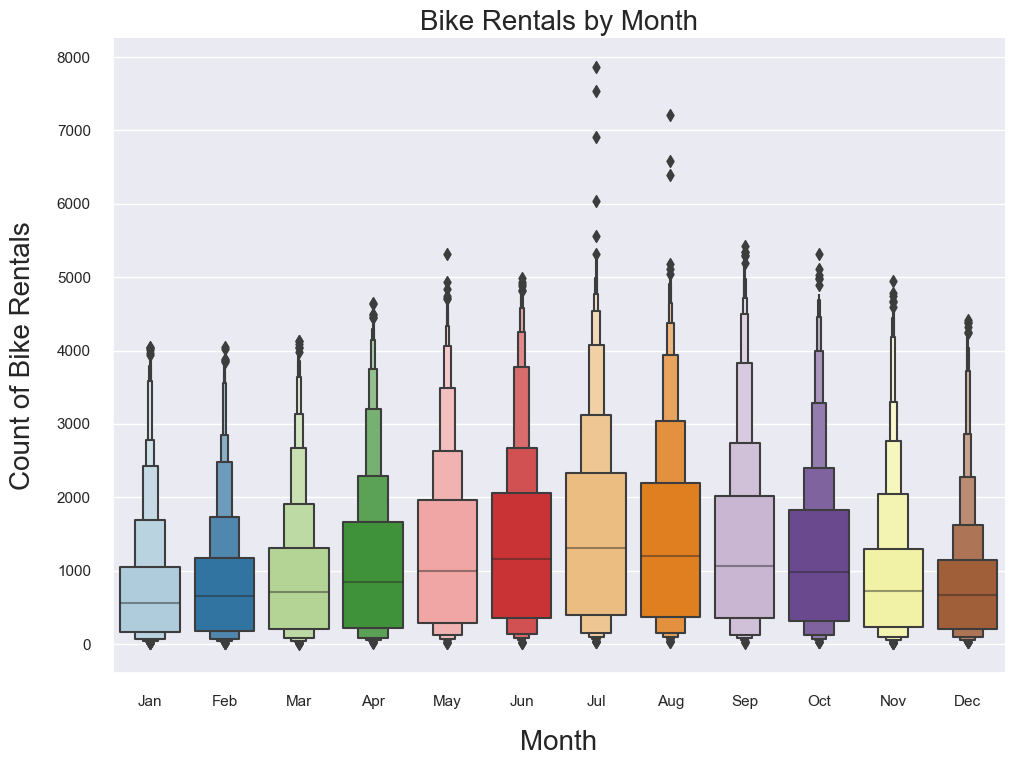

In [62]:
sns.catplot(x="month", y="cnt", kind="boxen",
            data=bike_df);

# changing label names
plt.xlabel("Month", fontsize=20, labelpad=15)
plt.ylabel("Count of Bike Rentals", fontsize=20, labelpad=15)

# adding graph title 
plt.title("Bike Rentals by Month", fontsize=20)

# changing the size of the graph
plt.gcf().set_size_inches(15, 10)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

Text(0.5, 46.94444444444446, 'Day')

Text(34.19444444444444, 0.5, 'Count of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Day')

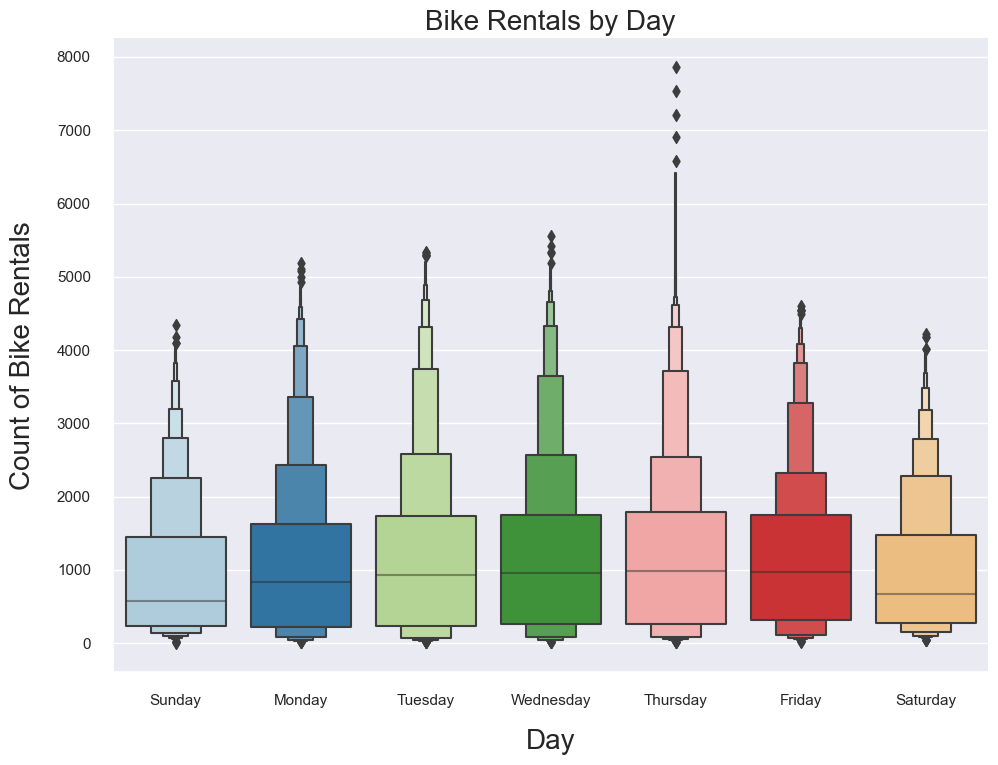

In [63]:
sns.catplot(x="day", y="cnt", kind="boxen",
            data=bike_df);

# changing label names
plt.xlabel("Day", fontsize=20, labelpad=15)
plt.ylabel("Count of Bike Rentals", fontsize=20, labelpad=15)

# adding graph title 
plt.title("Bike Rentals by Day", fontsize=20)

# changing the size of the graph
plt.gcf().set_size_inches(15, 10)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

Text(0.5, 46.94444444444446, 'Hour')

Text(34.19444444444444, 0.5, 'Count of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Hour')

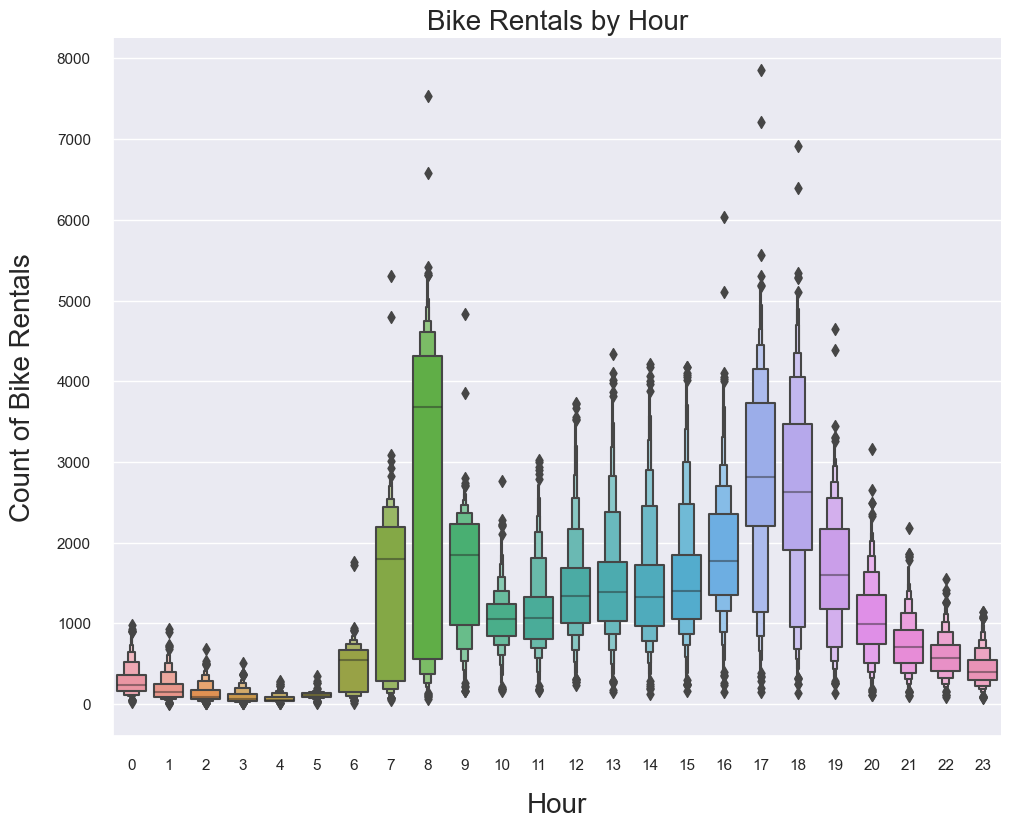

In [64]:
sns.catplot(x="hour", y="cnt", kind="boxen",
            data=bike_df.sort_values("hour"));

# changing label names
plt.xlabel("Hour", fontsize=20, labelpad=15)
plt.ylabel("Count of Bike Rentals", fontsize=20, labelpad=15)

# adding graph title 
plt.title("Bike Rentals by Hour", fontsize=20)

# changing the size of the graph
plt.gcf().set_size_inches(15, 11)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

<Axes: xlabel='t1', ylabel='cnt'>

(-5.0, 35.0)

([<matplotlib.axis.XTick at 0x23c5eb3bad0>,
 [Text(-5.0, 0, '-5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

Text(0.5, 0, 'Temperature in Celsius')

Text(0, 0.5, 'Count of bike rentals')

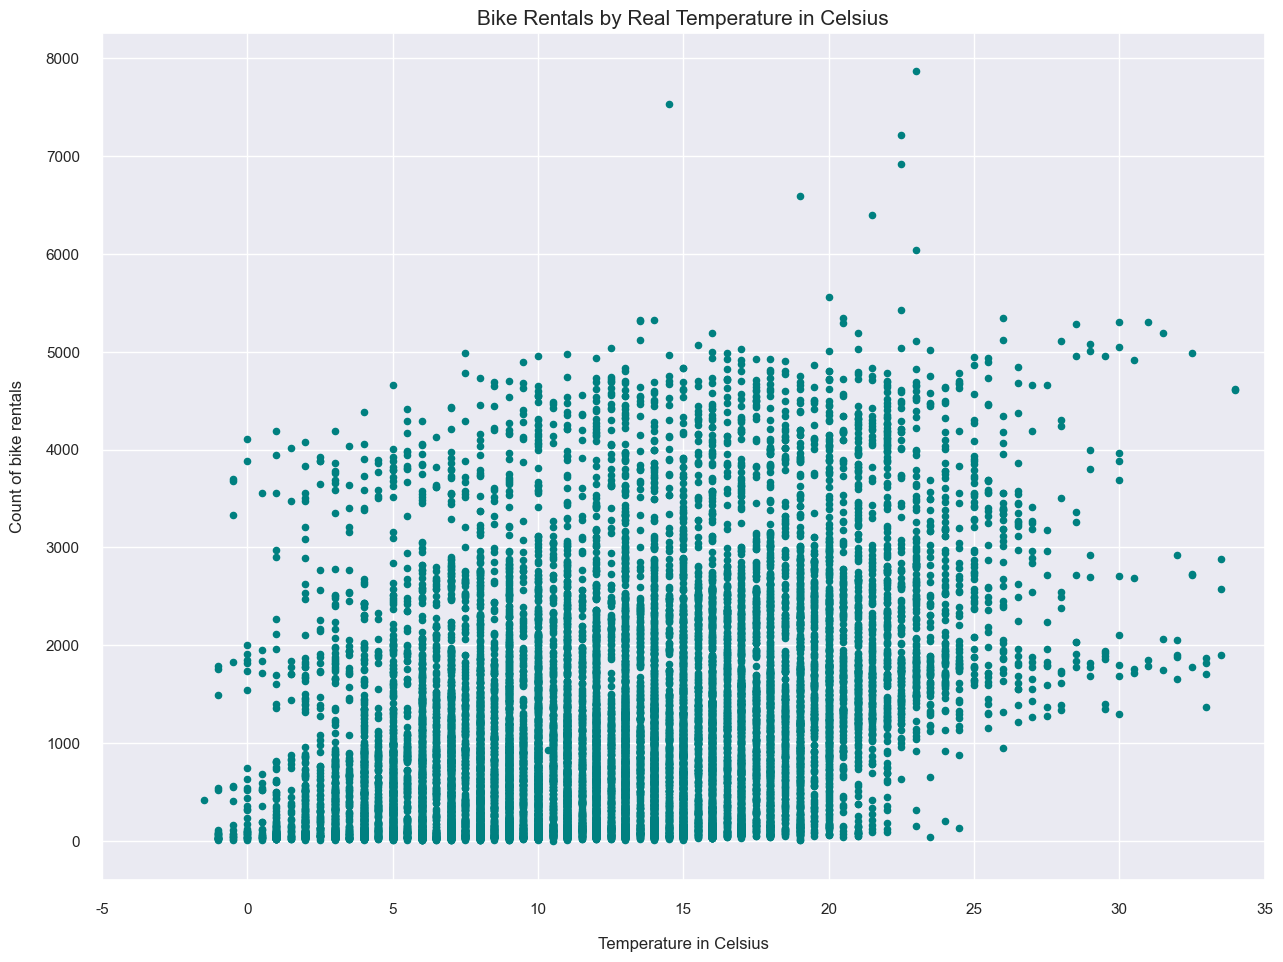

In [65]:
bike_df.plot(kind="scatter", x="t1", y="cnt", color="teal", figsize=(15,11));

# setting x limits
plt.xlim(-5,35);

# setting x ticks
labels = ("-5", "0", "5", "10", "15", "20", "25", "30", "35")
plt.xticks(np.linspace(-5,35,9, endpoint=True), labels);

# adding graph title 
plt.title('Bike Rentals by Real Temperature in Celsius', fontsize=15).set_position([.5, 1.02])

# changing label names
plt.xlabel('Temperature in Celsius', fontsize=12,labelpad=15)
plt.ylabel('Count of bike rentals', fontsize=12, labelpad=15)

# adding a legend
#plt.legend(loc='upper left', fontsize=12, frameon=True)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

<Axes: xlabel='t2', ylabel='cnt'>

(-10.0, 35.0)

([<matplotlib.axis.XTick at 0x23c612eef10>,
 [Text(-10.0, 0, '-10'),
  Text(-5.0, 0, '-5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

Text(0.5, 0, '"Feels-Like" - Temperature in Celsius')

Text(0, 0.5, 'Count of bike rentals')

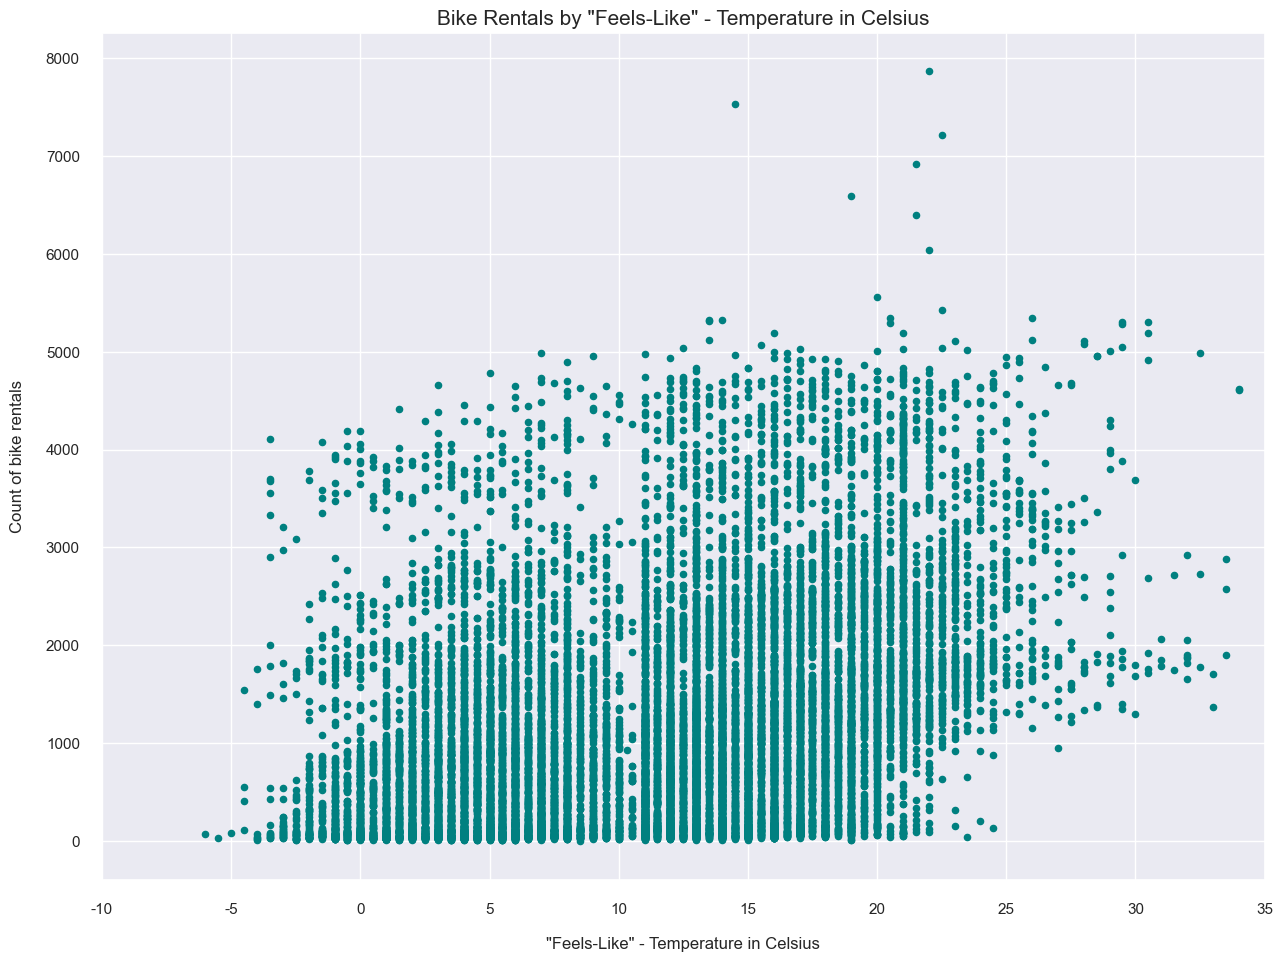

In [66]:
bike_df.plot(kind="scatter", x="t2", y="cnt", color="teal", figsize=(15,11));

# setting x limits
plt.xlim(-10,35);

# setting x ticks
labels = ("-10", "-5", "0", "5", "10", "15", "20", "25", "30", "35")
plt.xticks(np.linspace(-10,35,10, endpoint=True), labels);

# adding graph title 
plt.title('Bike Rentals by "Feels-Like" - Temperature in Celsius', fontsize=15).set_position([.5, 1.02])

# changing label names
plt.xlabel('"Feels-Like" - Temperature in Celsius', fontsize=12,labelpad=15)
plt.ylabel('Count of bike rentals', fontsize=12, labelpad=15)

# adding a legend
#plt.legend(loc='upper left', fontsize=12, frameon=True)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

<Axes: xlabel='hum', ylabel='cnt'>

(10.0, 110.0)

([<matplotlib.axis.XTick at 0x23c5fe92f50>,
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

Text(0.5, 0, 'Humidity in %')

Text(0, 0.5, 'Count of bike rentals')

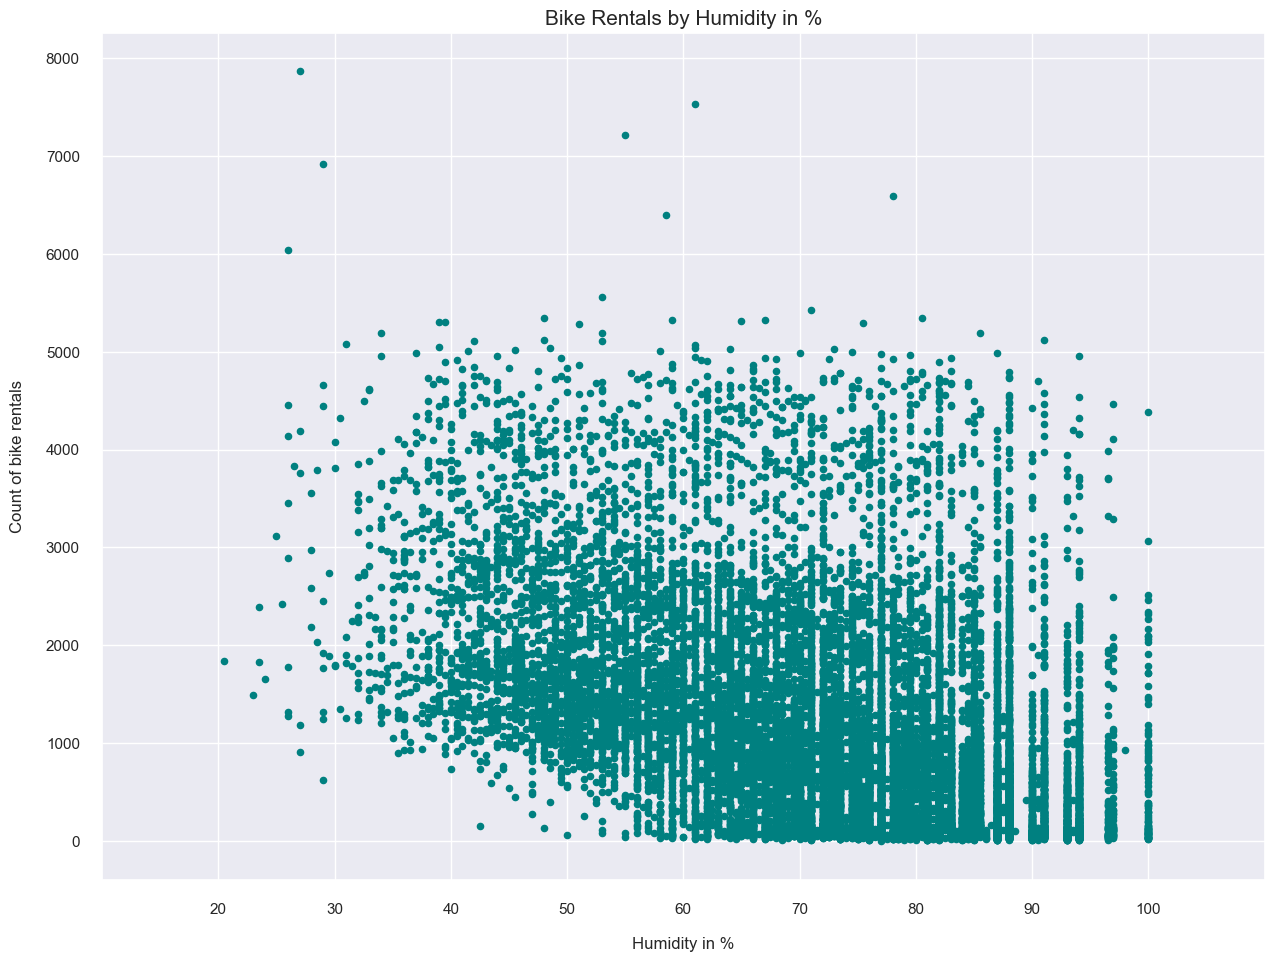

In [67]:
bike_df.plot(kind="scatter", x="hum", y="cnt", color="teal", figsize=(15,11));

# setting x limits
plt.xlim(10,110);

# setting x ticks
labels = ("20", "30", "40", "50", "60", "70", "80", "90", "100")
plt.xticks(np.linspace(20,100,9, endpoint=True), labels);

# adding graph title 
plt.title('Bike Rentals by Humidity in %', fontsize=15).set_position([.5, 1.02])

# changing label names
plt.xlabel('Humidity in %', fontsize=12,labelpad=15)
plt.ylabel('Count of bike rentals', fontsize=12, labelpad=15)

# adding a legend
#plt.legend(loc='upper left', fontsize=12, frameon=True)

# adding space between ticks and graph
plt.tick_params(axis='both', which='major', pad=10)

Our exploratory analysis showed that there are some outliers in our variables of interest. However, they are few and we should keep them as they are not outliers due to errors in data collection or measurement error. It is important to keep them in mind for further analysis and interpretation but we can continue with our analysis without further data cleaning.

## 5. Preparing the Data for Analysis

In order to run a linear regression model, we have to convert all categorical variables into dummy variables. The categorical variables are weather_code, is_holiday, is_weekend, and season. We add these four categorical variables into the linear regression model by dropping one of the categories to avoid perfect collinearity. 

In [73]:
# convert categorical variables into dummy variables
dummy1 = pd.get_dummies(bike_df['weather_code'],drop_first=True,prefix='weather_code')
dummy2 = pd.get_dummies(bike_df['is_holiday'],drop_first=True,prefix='holiday')
dummy3 = pd.get_dummies(bike_df['is_weekend'],drop_first=True,prefix='weekend')
dummy4 = pd.get_dummies(bike_df['season'],drop_first=True,prefix='season')

# Rename columns to remove decimals
dummy1.columns = dummy1.columns.str.replace(r'\.0$', '', regex=True)
dummy2.columns = dummy2.columns.str.replace(r'\.0$', '', regex=True)
dummy3.columns = dummy3.columns.str.replace(r'\.0$', '', regex=True)
dummy4.columns = dummy4.columns.str.replace(r'\.0$', '', regex=True)

merged = pd.concat([bike_df,dummy1,dummy2,dummy3,dummy4],axis=1) #combine dummy variables with original dataset

final_bike=merged.drop(['is_holiday','is_weekend','weather_code','season'],axis='columns') #drop unnessary columns
final_bike.head()  #final dataset for the linear regression

timestamp  cnt   t1   t2    hum  wind_speed  year month  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0  2015   Jan   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0  2015   Jan   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0  2015   Jan   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0  2015   Jan   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5  2015   Jan   

  month_name     day  ... weather_code_3  weather_code_4  weather_code_7  \
0    January  Sunday  ...           True           False           False   
1    January  Sunday  ...          False           False           False   
2    January  Sunday  ...          False           False           False   
3    January  Sunday  ...          False           False           False   
4    January  Sunday  ...          False           False           False   

   weather_code_10  weather_code_26  holiday_1 weekend_1 season_1 season_2  \
0            False            False      False      True    False    False   
1            False            False      False      True    False    False   
2            False            False      False      True    False    False   
3            False            False      False      True    False    False   
4            False            False      False      True    False    False   

   season_3  
0      True  
1      True  
2      True  
3      True  
4      True  

[5 rows x 30 columns]

In [74]:
variables = ['t1', 't2', 'hum', 'wind_speed','weather_code_10', 'weather_code_2', 'weather_code_26',
       'weather_code_3', 'weather_code_4', 'weather_code_7', 'holiday_1',
       'weekend_1', 'season_1', 'season_2', 'season_3'] # Extract columns from original dataset
features = final_bike[variables]
X = features.values # Take corresponding values from variables as X
y = final_bike.iloc[:, 1].values # Define the value from the first column of final dataset as y 

In [75]:
print(X.shape)
print(y.shape) #Make sure X and y have the same number of columns

(17414, 15)
(17414,)


In [77]:
# split data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Splitting the data into training and testing set in order to avoid the overfitting problem. We set 80% of the dataset as training set and the remaining 20% of the dataset as testing set.

## 6. Linear Regression Model

We choose the linear regression model as the first choice because the dependent variable in our dataset, count of bike shares, is a continuous variable. In this case, using the linear regression model seems to fit best with our data. We use the training set to train our model first and then apply it to the testing set.

In [78]:
from sklearn.linear_model import LinearRegression # Import linear regression function
model = LinearRegression()  
model.fit(X_train, y_train) #Plug the training set

LinearRegression()

In [79]:
y_pred = model.predict(X_test)

In [80]:
#Prediction result
print(model.score(X_test, y_test))

0.28796597262251444


After using the training set to predict the testing set, the accuracy score was around 0.2880. This means our model is only 28.80% accurate for predicting new data.

In [81]:
#R-squared; adjusted R-squared
model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

(0.2904027877886367, 0.2897909957330459)

We also checked the R-squared and adjusted R-squared score. In our linear regression model, 29% of the variance in the dependent variable can be explained by the independent variables.

The adjusted R² score, which corrects the R² by accounting for the number of features and penalizing excessive predictors is roughly the same as non-adjusted R².

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(15) #Show a table for the difference between the actual and predicted results

The predicted results and resulting accuracy of our model were not optimistic. Our linear regression model does not have adequate explaining power and is not feasible to predict the number of bike-rental demand. Based on the results, we decide to use another model which is time series regression ARIMA model since early data exploration suggests that there is a daily usage pattern for bike-rentals in London.

## 7. Time Series - ARIMA

In [89]:
#Check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
from statsmodels.tsa.arima.model import ARIMA
from dateutil.parser import parse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log

In this part we will run a timeseries regression model using the ARIMA (Auto Regressive Integrated Moving Average) method. This method models time series by combining autoregression, differencing, and moving averages to capture trends and patterns


In [83]:
result = adfuller(bike_df.cnt.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.879285
p-value: 0.000000


The Augmented Dickey-Fuller (ADF) test assesses whether a time series is stationary (its statistical properties do not change over time) or has a unit root (is non-stationary). The test result shows that our p-value is very small, so we are confident to reject the null hypothesis that the time series has a unit root. Our data is therefore stationay and is suitable for modelling with ARIMA without needing diferencing. 

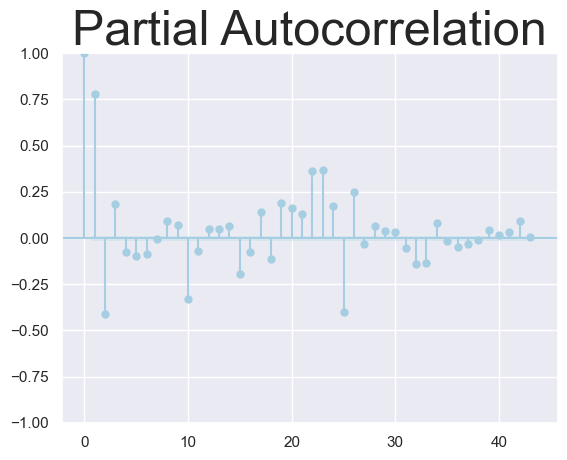

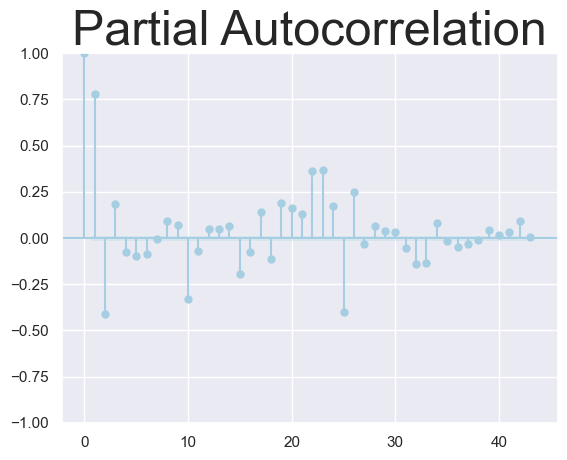

In [84]:
#Plot ACF & PACF
#plot_acf(bike_data['cnt']) 
plot_pacf(bike_data['cnt']) 

After confirming our dataset is already stationarized, the next step is to determine whether Autoregressive (AR) or Moving Average (MA) terms are needed to correct any autocorrelation remaining and what value of AR or MA should take. 

By looking at the autocorrelation function (ACF), it shows the coefficient of correlation between the time series and lags of itself, and PACF plot is a plot of the partial correlation coefficients between the series and lags of itself (Duke University, 2019). 

Text(0.5, 1.0, 'Original Series')

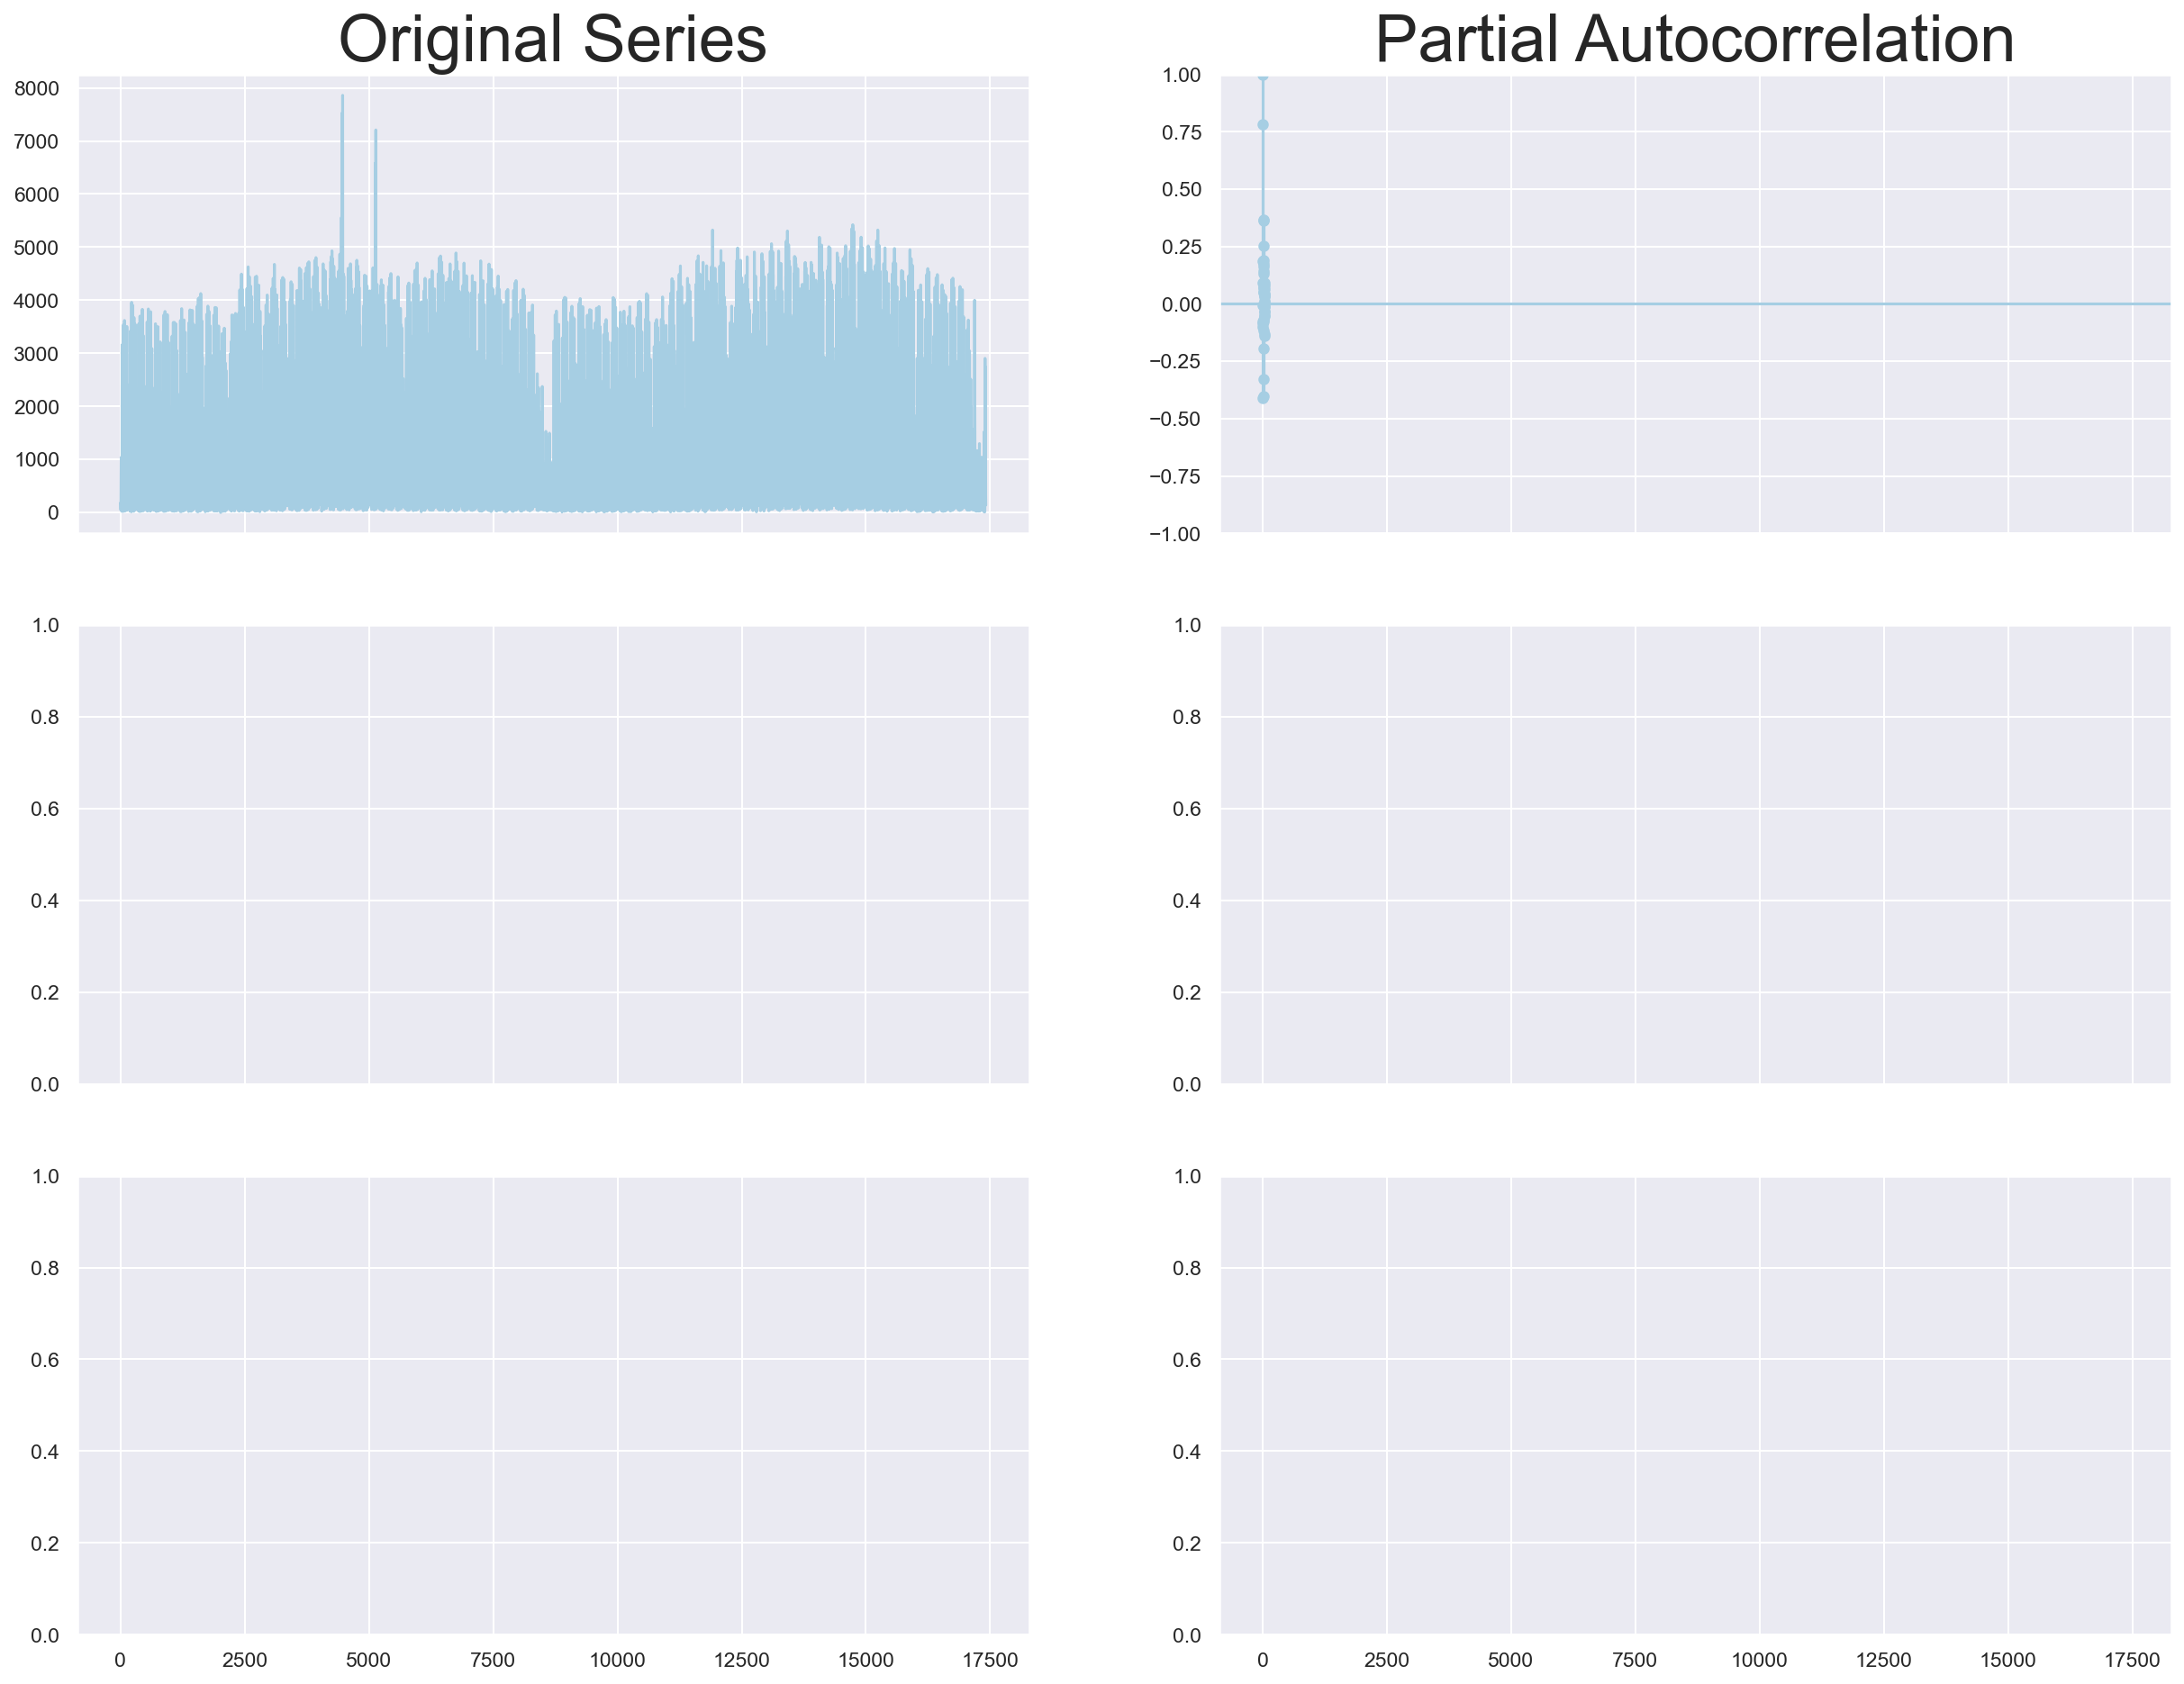

Text(0.5, 1.0, '1st Order Differencing')

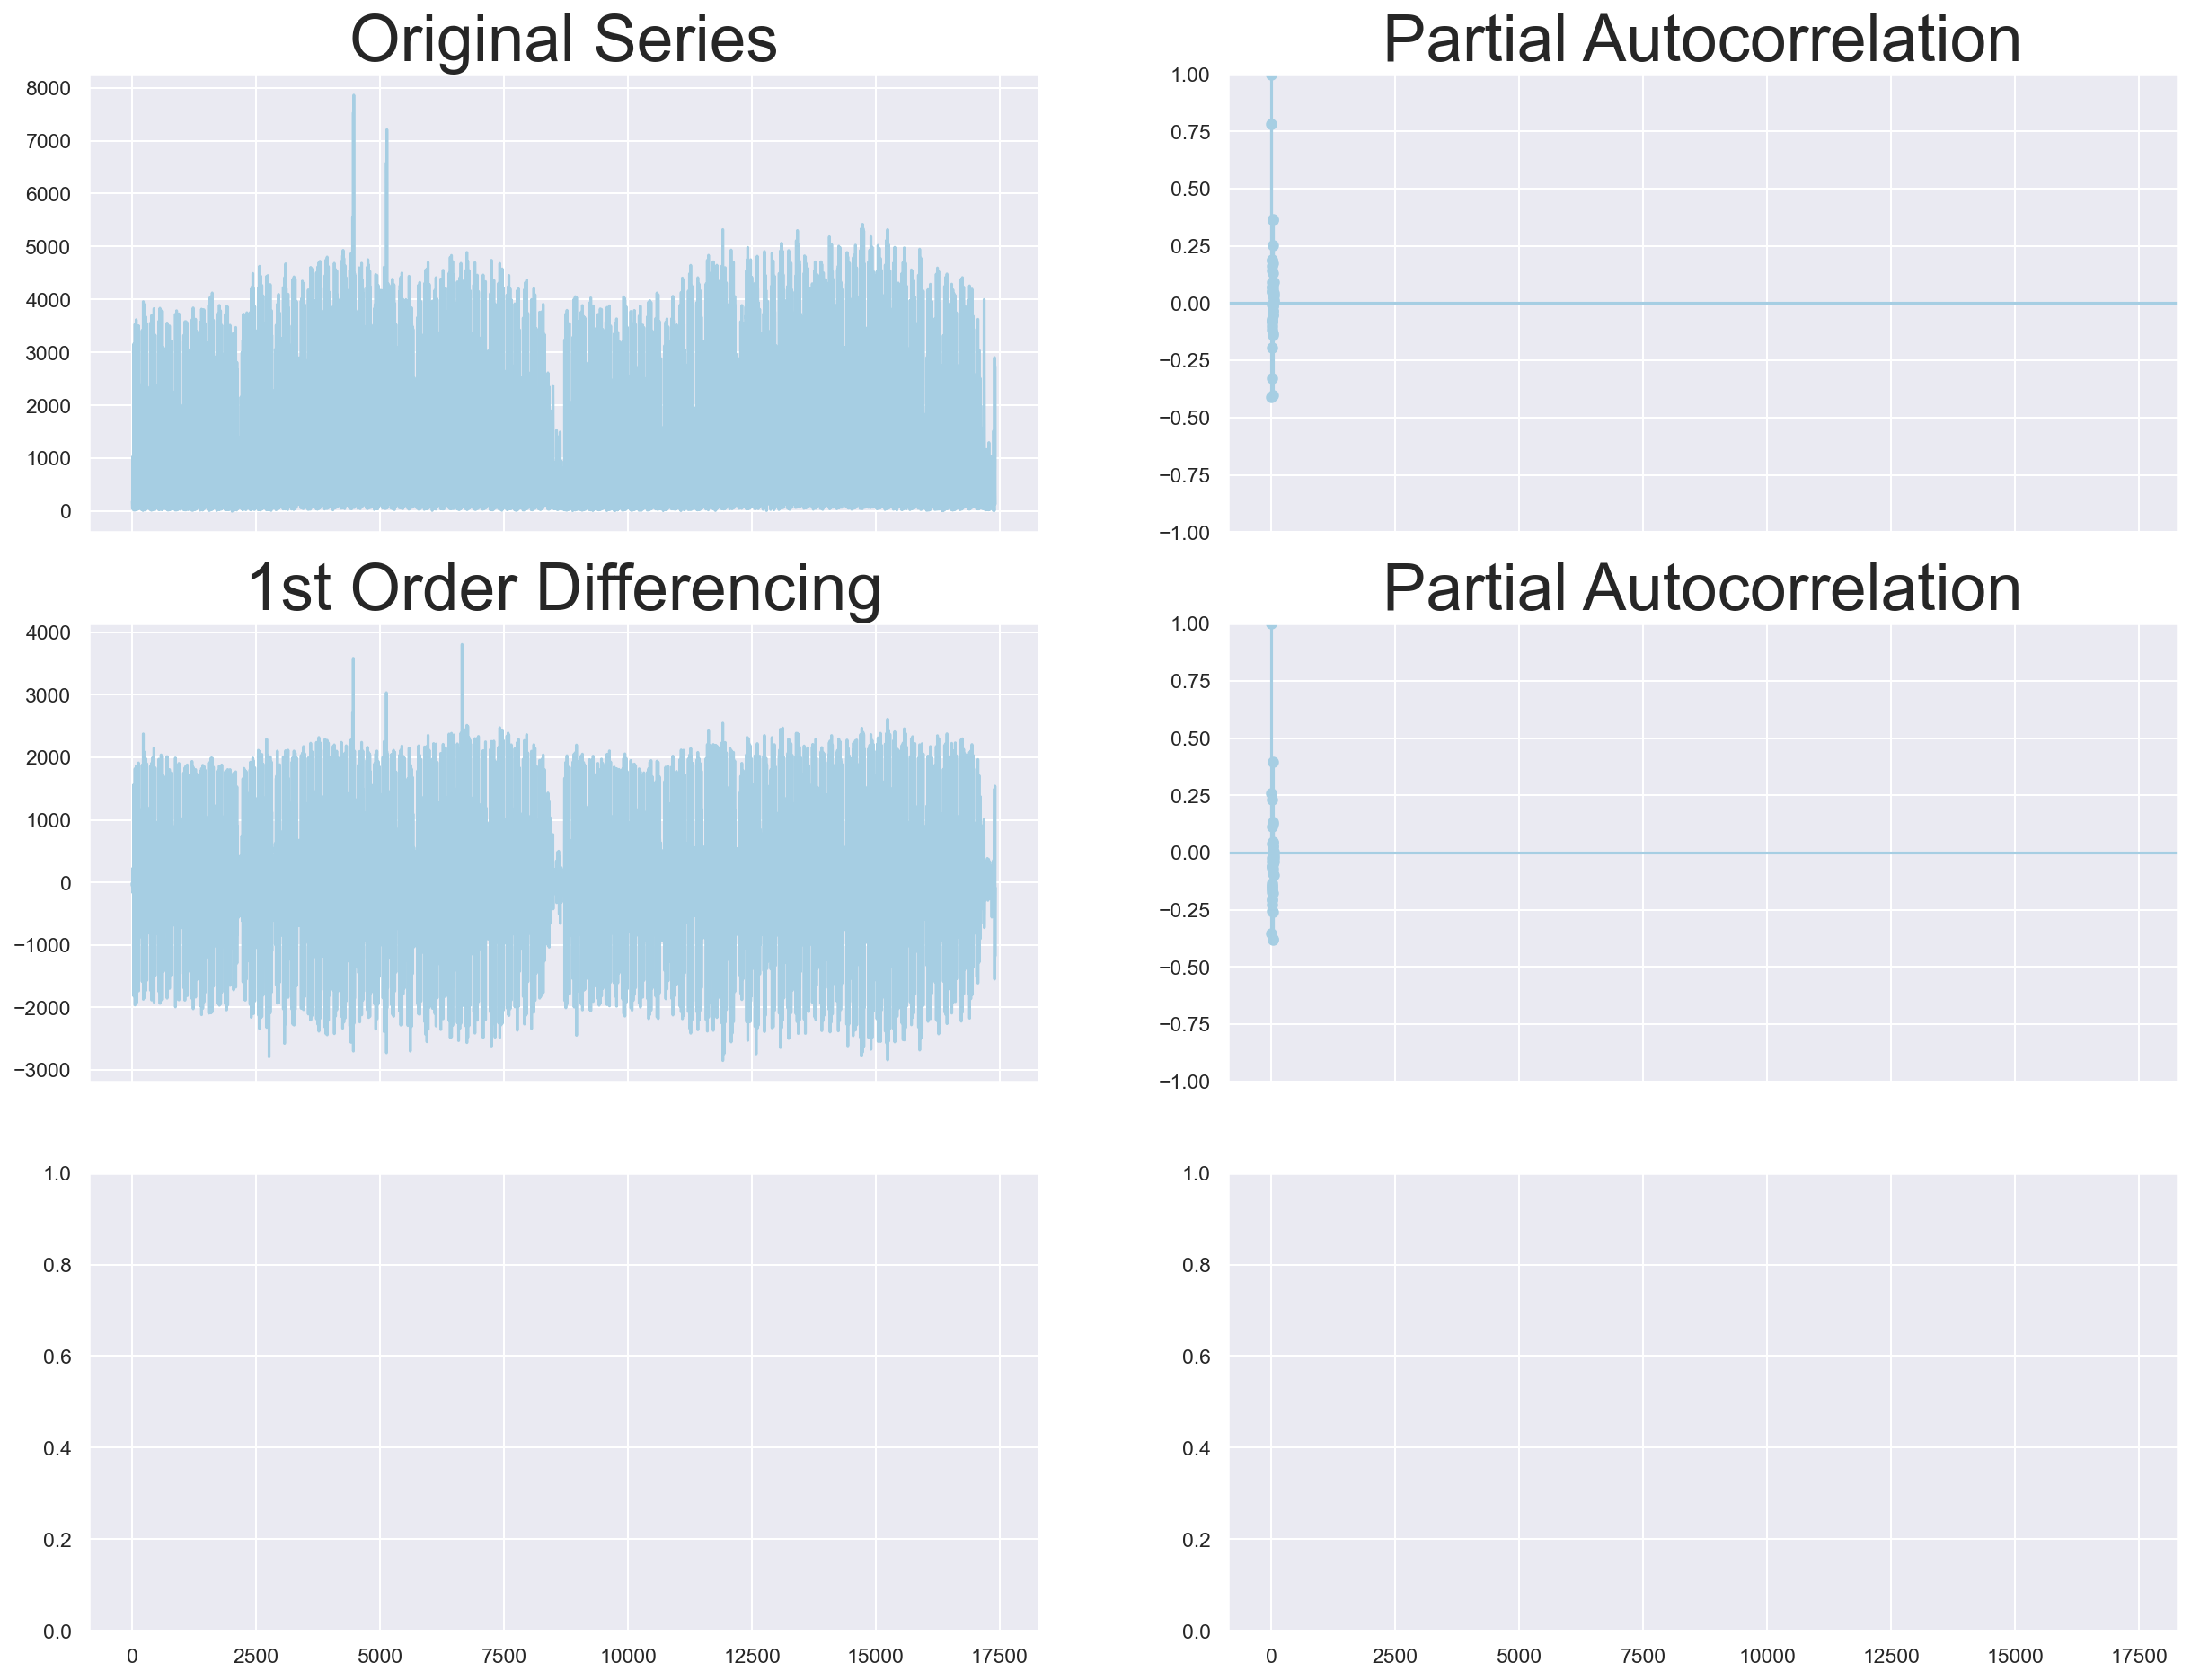

Text(0.5, 1.0, '2nd Order Differencing')

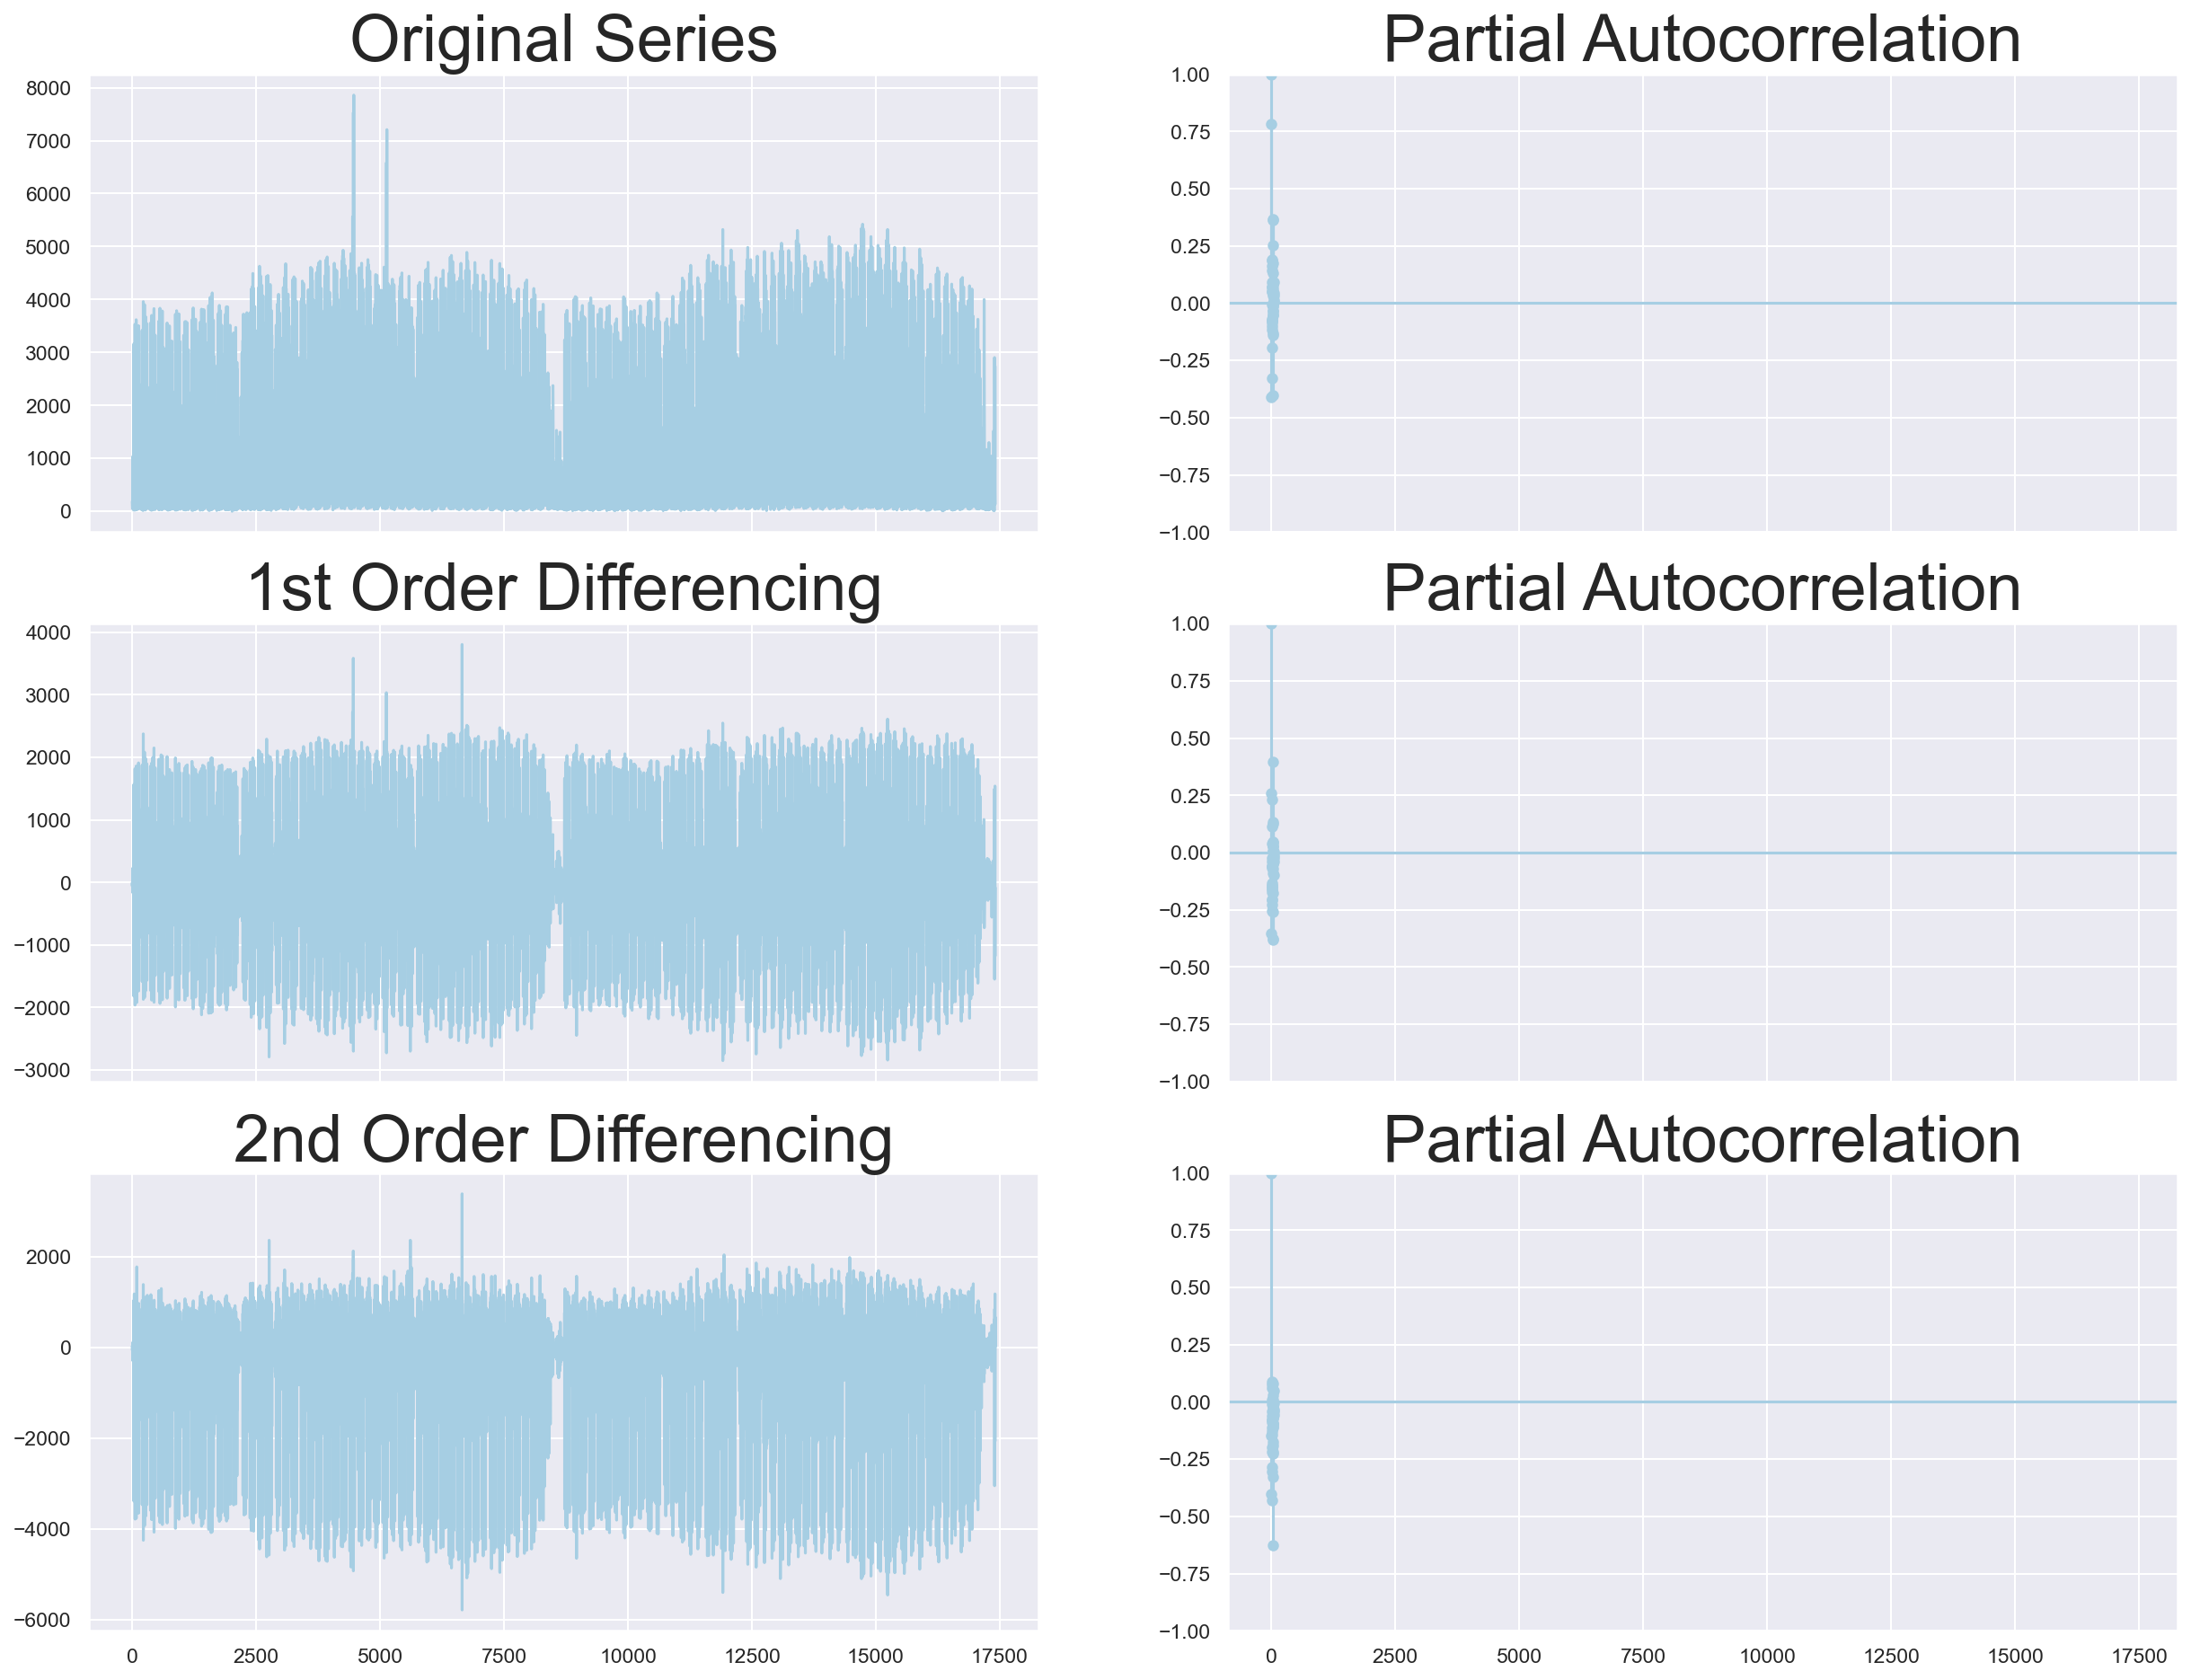

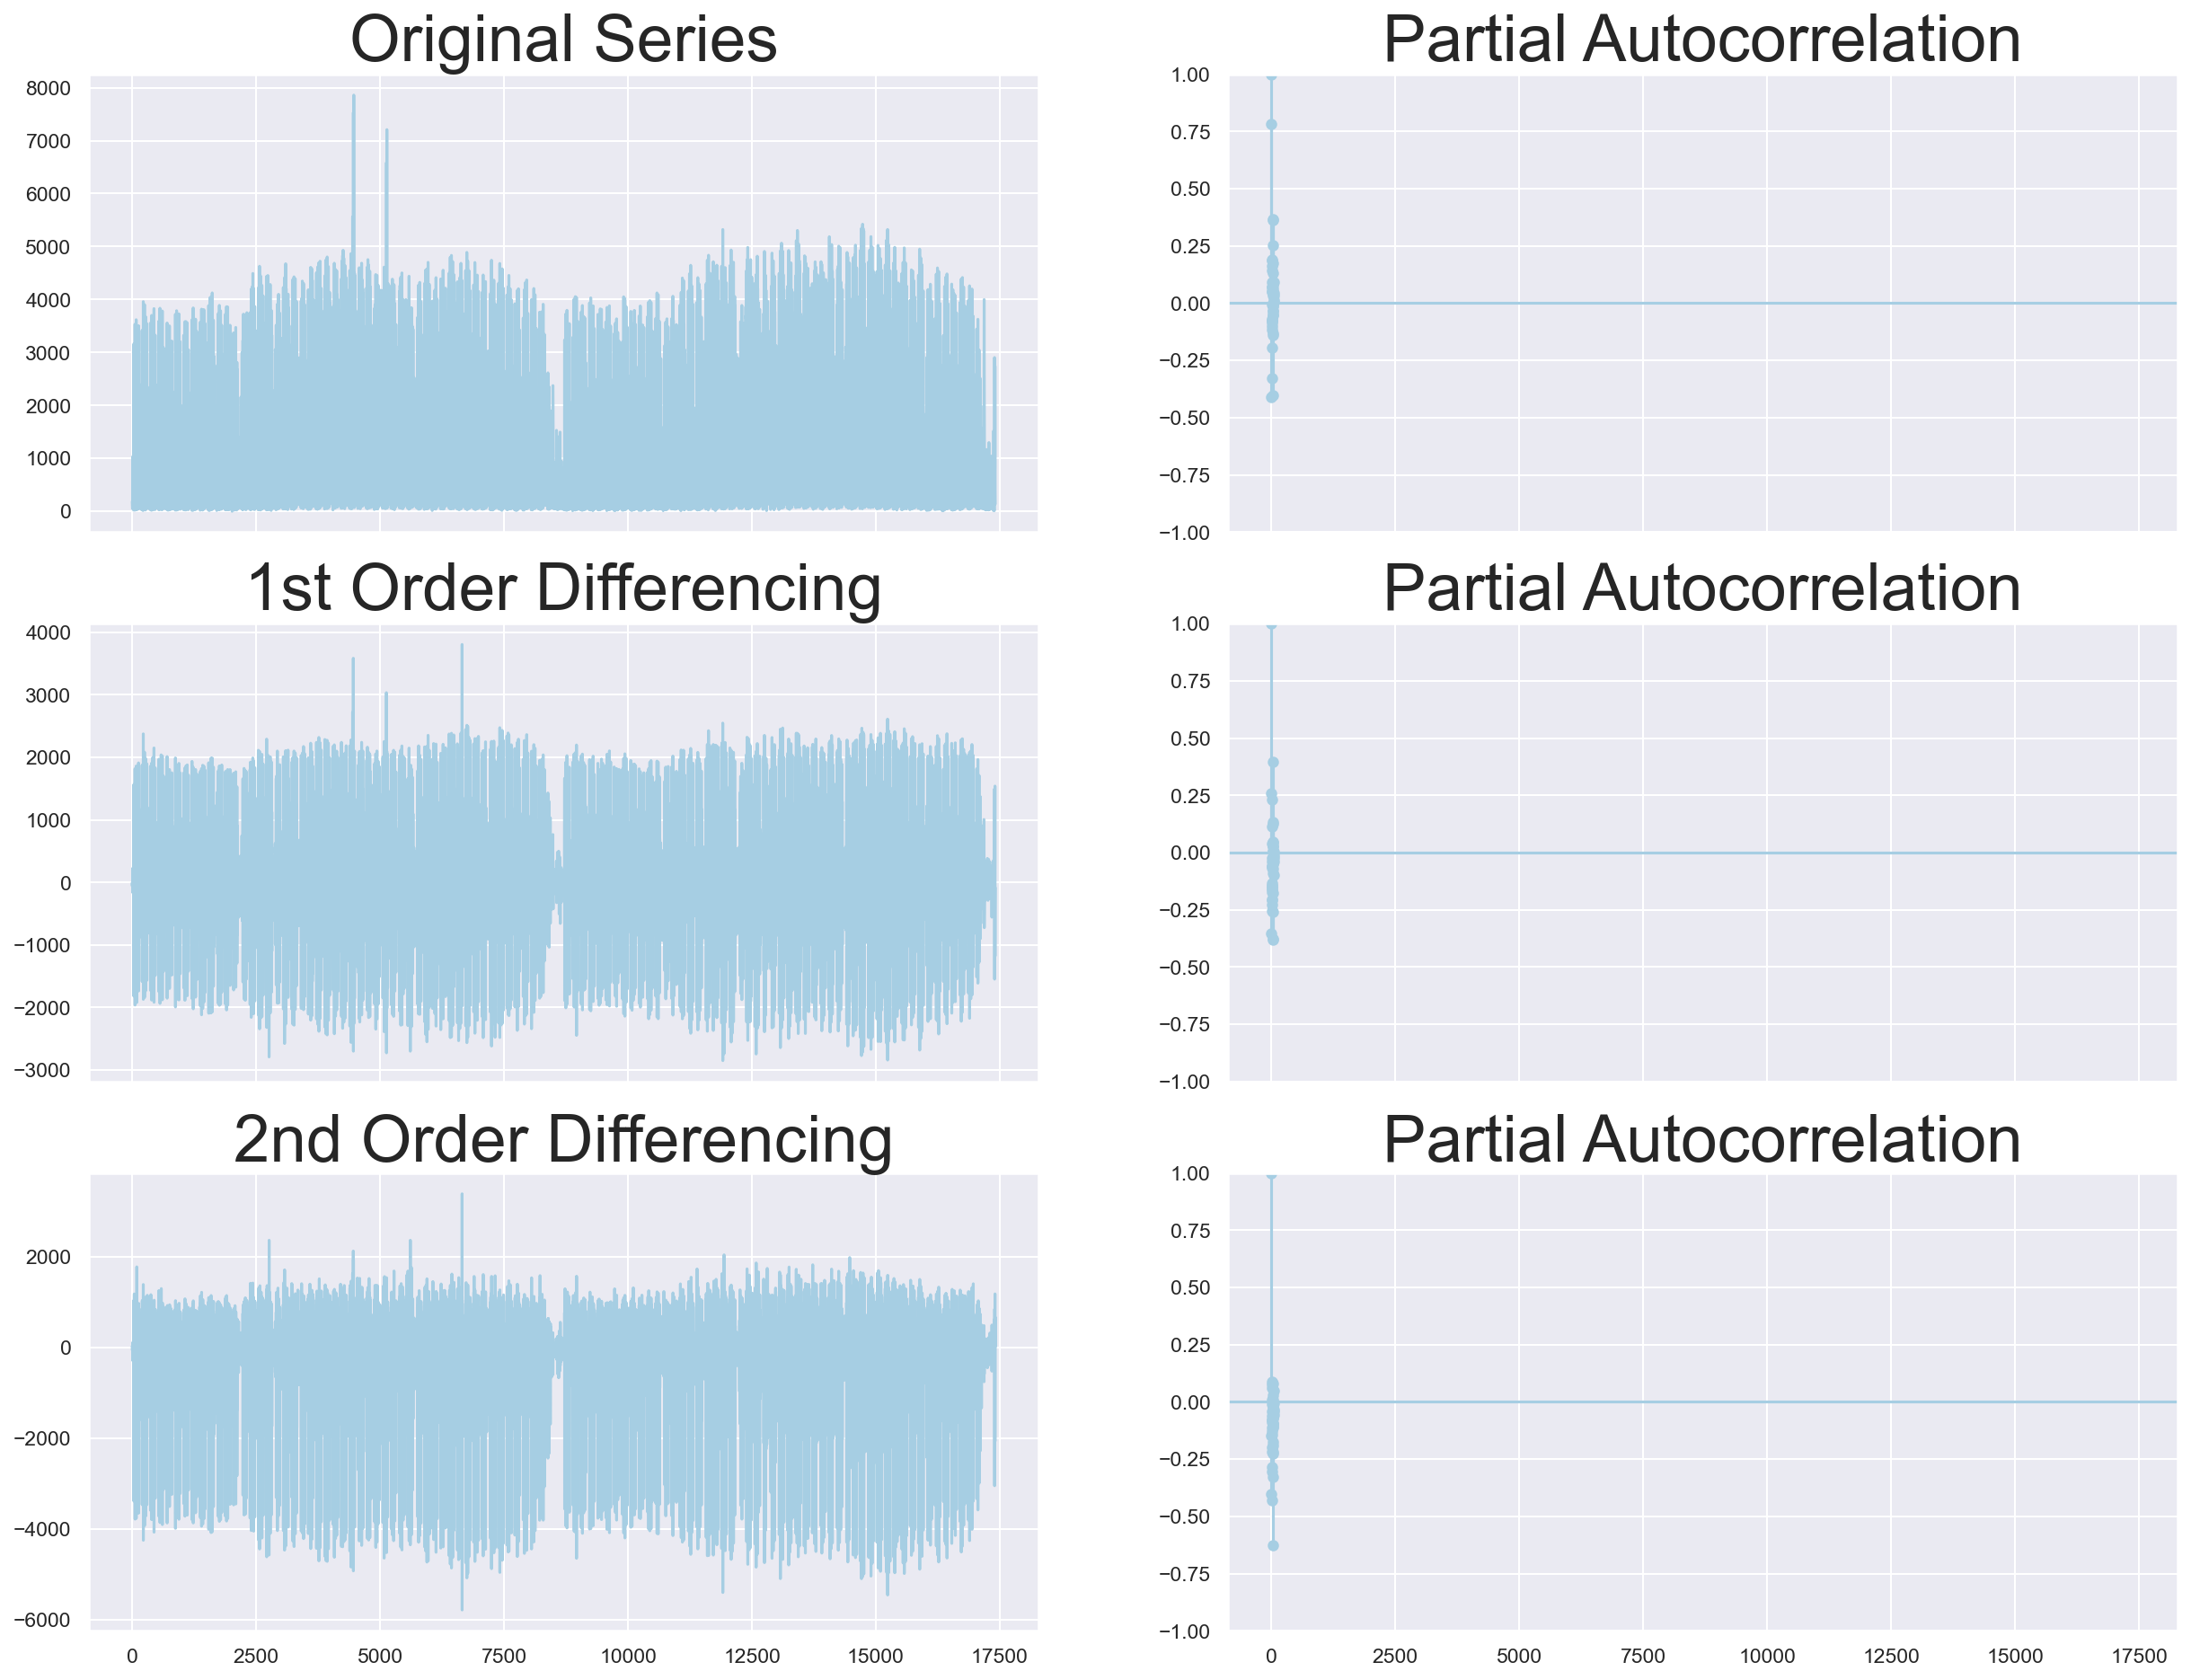

In [86]:
#Validation the difference the series and see how the autocorrelation plot looks like.
plt.rcParams.update({'figure.figsize':(20,15), 'figure.dpi':150})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(bike_df.cnt); axes[0, 0].set_title('Original Series')
plot_pacf(bike_df.cnt, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(bike_df.cnt.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(bike_df.cnt.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(bike_df.cnt.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(bike_df.cnt.diff().diff().dropna(), ax=axes[2, 1])

#plt.show()

The left graphs confirm our data is stationary at the beginning and taking difference does not help us to improve the stationary. The partial auto correlation graph shows we have a positive correlation at the beginning, so we are conservative and take q=1. 

For the AR term, as our early data exploration suggested that the daily usage data has a constant pattern, we decided to take 24 lags as we have hourly data.

In [91]:
#spilt training and validation
X=bike_df.cnt.values
train = X[:17342] #17342 data as train data
test = X[17342:] #72 data as test data
prediction = []

In [92]:
model = ARIMA(train, order=(24,0,1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [ ]:
prediction = model_fit.forecast(steps=72)[0]
prediction

In [ ]:
plt.plot(test)
plt.plot(prediction,color='red')

The blue line shows the actual data while the red line shows our predicted value. Based on the prediction output, our ARIMA model capture most of the demand pattern.
<br><br>
The effectiveness of the ARIMA model indicates that past data points can be a good predictor of future demand of bike-rentals for the same data points. For example, during peak time we expect to have more demand compared to weekends or nights.

## 8. Summary and Limitations

### Summary

Based on our findings in both the exploratory analysis and ARIMA model, we would advise TFL to decrease prices during the weekends, holidays and off-peak times.

By doing this, TfL can incentivize customers to use the bikes even more. One possible way of doing so is to increase the timeframe, in which the bikes can be rented without extra costs, from 30 min to 1 hour during off-peak hours. Another recommendation is to decrease the base fare of £2 to £1 on the weekends and on holidays. As we've seen the demand for bike-rentals drops during the weekend and a lower base fare could incentivize more people to rent a bike rather than taking the tube or a car.


### Limitations

For our overall dataset, there might be omitted variable bias because we have a limited number of variables in our dataset. It is possible that we omitted some variables that affect the number of bike-rentals and are correlated with the variables included in our model. The results from the linear regression model are not as good as expected. Including interaction terms in the model might have improved the results. The independent variables in our dataset are likely to interact with each other but we did not capture any interactions. Including interaction terms could generate a higher explaining power.
<br><br>
For future improvement on ARIMA, we should add weather conditions and seasonality as control variables into our model, to better observe the trend affected by these circumstances. Moreover, we should also extend our test data volume to further validate its performance.

## References

Duke University (2019) ‘Identifying the numbers of AR or MA terms in an ARIMA model’. Available at: https://people.duke.edu/~rnau/411arim3.htm (Accessed: 11th December 2019)